






Note to self, if it takes too long to run, then just don't run any of the parts that take too long, unless tweaks are applied to the data preprocessing part. You only need to run it once for the output. Hello.

### Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from xgboost import XGBClassifier
from sklearn.metrics import log_loss

## Part A - Model Variety Training

### Import Dataframe

In [2]:
# Load the dataset from a Folder called Datasets, plaed inside C drive.
df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")
df_raw

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\1256870994.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")


,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,11/4/2021 0:00,7/11/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,10/12/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,3/10/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### View Unique values for Crimes

In [4]:
unique_desc = df_raw["Crm Cd Desc"].dropna().unique()
len(unique_desc), unique_desc

(140,
 array(['THEFT OF IDENTITY',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'VEHICLE - ATTEMPT STOLEN',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'BATTERY WITH SEXUAL CONTACT',
        'LETTERS, LEWD  -  TELEPHONE

## DataPrep

### Map each Crime commited to a matching Criminal Offense

In [5]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df_raw["Crime_Class"] = df_raw["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df_raw[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [6]:
df_raw['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


Let's start with RAW, unprocesseed model training, then work our way up.

## Category: Machine Learning Models.


### Tree Based: Decision Tree (RAW)

In [7]:
# Remove Crm Cd Desc to avoid leakage
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(X_train, y_train)

# Predict
y_pred_test_1 = dt_model_1.predict(X_test)
y_pred_train_1 = dt_model_1.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

Training Set Accuracy: 0.7109182323065049
Testing Set Accuracy: 0.7102269335119967
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.710202  0.946356  0.811446  356035.000000
1              0.712402  0.998770  0.831624  163391.000000
2              0.000000  0.000000  0.000000   44202.000000
3              0.000000  0.000000  0.000000   86340.000000
4              0.000000  0.000000  0.000000   13595.000000
5              0.000000  0.000000  0.000000    8282.000000
6              0.000000  0.000000  0.000000   15207.000000
7              0.000000  0.000000  0.000000   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.000000  0.000000  0.000000    1957.000000
accuracy       0.710918  0.710918  0.710918       0.710918
macro avg      0.14

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tree Based: Random Forest (RAW)

*Without any parameters, this thing will take a while...

In [ ]:
print("=== Random Forest Crime Classification ===")

# Remove Crm Cd Desc to avoid leakage
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, class_names = pd.factorize(df_model["Crime_Class"])

# Convert datetime columns to int timestamps
for col in X.select_dtypes(include=['datetime', 'datetimetz']).columns:
    X[col] = X[col].view('int64')

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize Random Forest with balanced, regularized params
rf_model_1 = RandomForestClassifier()
# Save paraneter tunning for PART B. 

rf_model_1.fit(X_train, y_train)

# Predictions
y_pred_test_1 = rf_model_1.predict(X_test)
y_pred_train_1 = rf_model_1.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("\n=== Performance ===")
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Testing Set Accuracy:  {test_accuracy}")
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")

# Evaluation reports
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

### Linear/Probability Based: Logistic Regression (RAW)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ... (Assuming df_raw is already loaded) ...

# 1. Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# 2. Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# 3. Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# 4. Handle missing values
X = X.fillna(X.median())

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6. Scale features 
# (Critically important for Logistic Regression convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# CHANGE: Build Logistic Regression Model (No Parameters)
# ---------------------------------------------------------
lr_model = LogisticRegression() 

# Train model
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_train_1 = lr_model.predict(X_train_scaled)
y_pred_test_1 = lr_model.predict(X_test_scaled)

# Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

### Linear/Probability Based: Naive Bayes (RAW)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 1. Clean up leakage columns first to free space immediately
drop_cols = [
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
]
# Only drop if they actually exist in the dataframe
cols_to_drop = [c for c in drop_cols if c in df_raw.columns]
df_model = df_raw.drop(columns=cols_to_drop)

# 2. Separate Target
y, _ = pd.factorize(df_model["Crime_Class"])
X = df_model.drop(columns=["Crime_Class"])

# 3. THE FIX: In-Place Memory Optimized Conversion
# Instead of 'apply' (which clones data), we loop and modify column by column.
# .cat.codes is extremely memory efficient.
print("Converting columns to codes...")
for col in X.columns:
    # Convert to category type first
    X[col] = X[col].astype('category')
    # Extract codes (returns -1 for NaNs)
    X[col] = X[col].cat.codes
    
    # Handle NaNs (-1) by shifting everything up by 1
    # This also ensures no value is 0, which MultinomialNB prefers
    X[col] = X[col] + 1

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Model
# We stick to MultinomialNB because CategoricalNB is the one that wanted 18GB of RAM earlier.
print("Training MultinomialNB...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 6. Evaluate
print("Predicting...")
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy:  {test_accuracy}")
print("-" * 30)
print(classification_report(y_test, y_pred_test))

### Gradient: XGBoost (RAW)

In [ ]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_1 = XGBClassifier()
#    n_estimators=300,
#    learning_rate=0.1,
#    max_depth=6,
#    subsample=0.8,
#    colsample_bytree=0.8,
#    eval_metric="mlogloss",
#    random_state=42
# )

xgb_model_1.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_1.predict(X_train)
y_pred_test = xgb_model_1.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


## Category: Deep Learning Models



### Neural Networks: CNN

In [ ]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_cnn).argmax(axis=1)
y_pred_test = model.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

### Neural Network: ANN

In [ ]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,              #Use 10 as a derfault value for epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Can be improved? Time to find out.

## Part A - Feature Engineering and Transformation

### Data Cleaning

Check for Duplicates

In [8]:
df_new = df_raw.drop_duplicates()
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,11/4/2021 0:00,7/11/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,10/12/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,3/10/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


None found.

### Removing Columns 
Do not proceed without caution. In this context, the chosen columns were dropped due to them having a direct relationship to the target class, which may cause a leakage.

In [9]:
df_new = df_new.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,...,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,11/4/2021 0:00,7/11/2020 0:00,845,15,N Hollywood,1502,2,377,31,...,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,...,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,10/12/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,...,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,...,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,3/10/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,...,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,...,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,...,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,...,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,...,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Standardization

In this phase, TAKE NOTE that anything, once you hit run, results in the dataframe being permanently changed. So to rerun this segment, you MUST reload and reimport the DataFrame again.

In [10]:
# 1. Clean DATE OCC (mixed formats)
df_new['DATE OCC'] = pd.to_datetime(df_new['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df_new['TIME OCC'] = pd.to_numeric(df_new['TIME OCC'], errors='coerce').astype('Int64')
time_str = df_new['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df_new['DateTime OCC'] = pd.to_datetime(
    df_new['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df_new = df_new.drop(columns=['DATE OCC', 'TIME OCC'])

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,211507896,11/4/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-07-11 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,240913563,10/12/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,201418201,3/10/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


### Check for NULL values

In [11]:
df_new.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Leave as NULL, since some records do in fact not possess the given info.

In [12]:
df_new = df_new.drop(columns=[' '])
df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,11/4/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-07-11 08:45:00
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,10/12/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,3/10/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

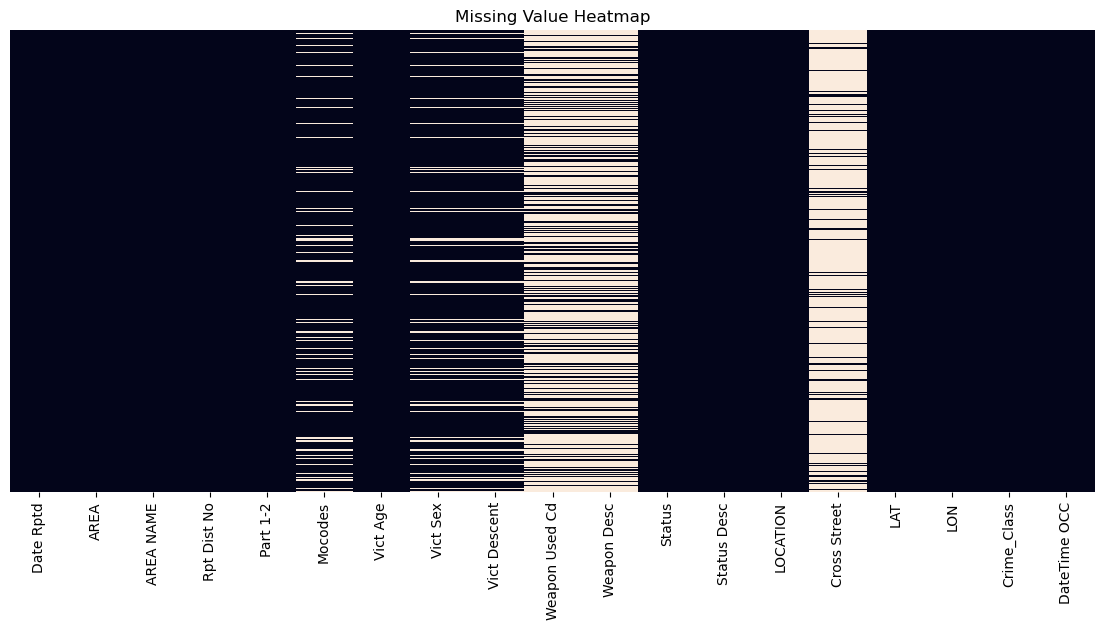

In [13]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

In [14]:
# 1. Drop the Weapon Used Cd column (if it exists)
df_new = df_new.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df_new['Weapon_Present'] = df_new['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df_new = df_new.drop(columns=['Weapon Desc'], errors='ignore')

df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC,Weapon_Present
0,11/4/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-07-11 08:45:00,Absent
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00,Present
2,10/12/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00,Absent
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00,Absent
4,3/10/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00,Absent
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00,Absent
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00,Absent
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00,Present


Check again.

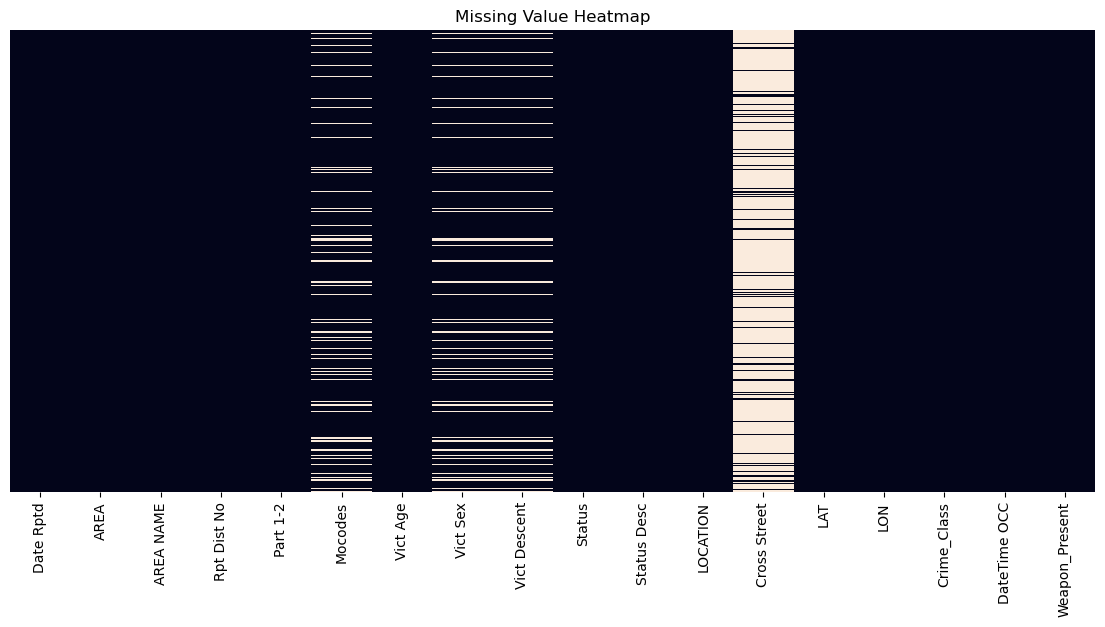

In [15]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

### Dropping columns that provide meaningless value:

Start with obvious ones, Location of the crime will often be unique among all records, but the area/district may not. So it can be dropped.

To do so, apply a test such as Pearson Correlation

Cross Street possess a lot of missing values. This can be dropped completely if Location is already sufficient info.

As for Mo Codes, this is neglectable, since some records may only be a minor offense. So no MO Code may have been recorded.

This applies to victim sex and descent as well, since not all crimes have a victim involved, such as vandalisme.

### Test Pearson Correlation (Numeric Features)


Top 25 strongest Pearson correlations (absolute):
      Feature 1            Feature 2  Correlation
0          AREA          Rpt Dist No     0.999051
18          LAT                  LON    -0.998190
11     Part 1-2             Vict Age     0.206183
17     Vict Age  Crime_Class_numeric    -0.081723
14     Part 1-2  Crime_Class_numeric     0.071209
13     Part 1-2                  LON     0.029212
12     Part 1-2                  LAT    -0.028722
3          AREA                  LAT     0.025338
8   Rpt Dist No                  LAT     0.025077
7   Rpt Dist No             Vict Age     0.022624
2          AREA             Vict Age     0.022593
4          AREA                  LON    -0.010541
9   Rpt Dist No                  LON    -0.010469
1          AREA             Part 1-2     0.007675
6   Rpt Dist No             Part 1-2     0.007489
10  Rpt Dist No  Crime_Class_numeric    -0.003770
5          AREA  Crime_Class_numeric    -0.003678
16     Vict Age                  LON     0.002219


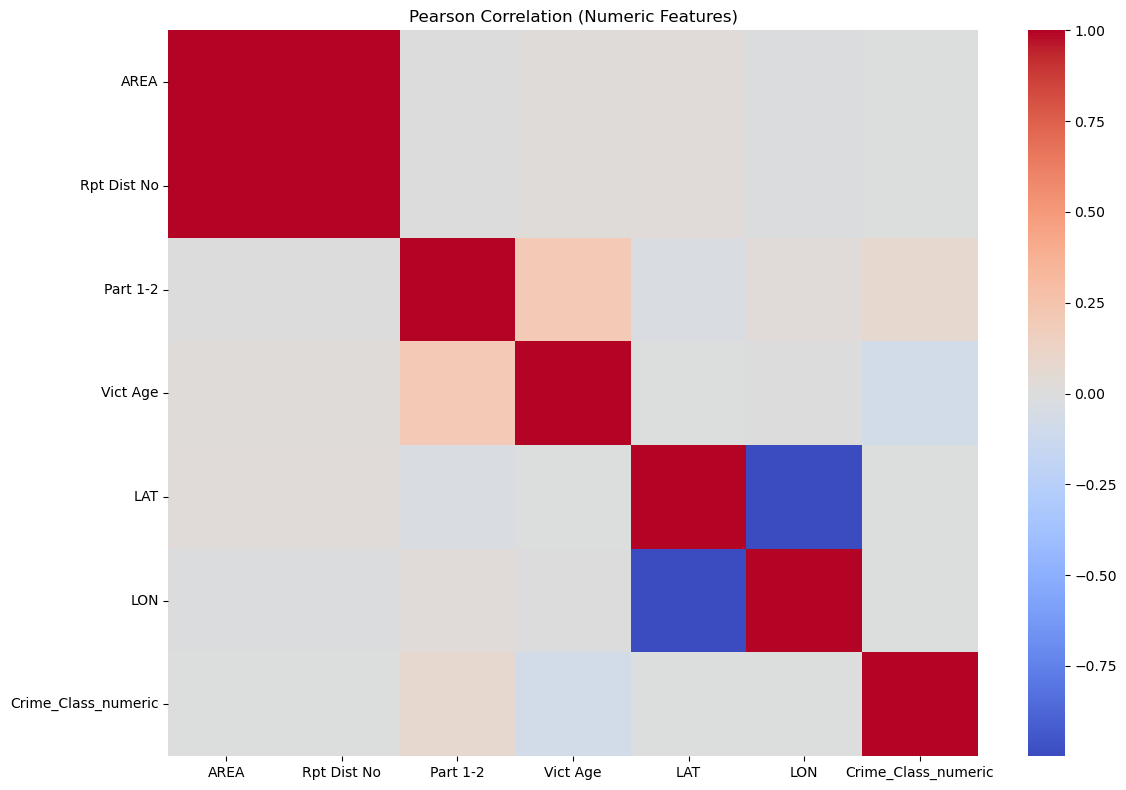

In [16]:
# Choose the DataFrame to analyze; use the most recent processed one if available
try:
    df_corr_source = df_new.copy()
except NameError:
    df_corr_source = df_raw.copy()

# Ensure target encoding (optional): demonstrate correlation against encoded target when present
if 'Crime_Class' in df_corr_source.columns:
    df_corr_source['Crime_Class_numeric'] = df_corr_source['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr_source.select_dtypes(include=['number'])

# Pearson correlation matrix
corr = num_df.corr(numeric_only=True)

# Upper triangle flatten for pairwise sorted report
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_report = (
    upper.stack()
          .reset_index()
          .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

# Show top pairs
print("Top 25 strongest Pearson correlations (absolute):")
print(corr_report.head(25))

# Optional: heatmap for a quick visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Pearson Correlation (Numeric Features)')
plt.tight_layout()
plt.show()

### What can be derived freom this correlation table?

1. Area and Rpt Dist No are inheritelly the same info, if you know the area where the crime occured, is the specific District Number really required?
2. Many features have a correlation near 0, this implies that many features are highly independent. In  which, leave them be.
3. Latitude and Longitude do provide the coordinates of the crime, but neither predicts each other.


In [17]:
# Make a copy of the data
df_corr = df_new.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)


,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1004991 non-null  object        
 1   AREA            1004991 non-null  int64         
 2   AREA NAME       1004991 non-null  object        
 3   Rpt Dist No     1004991 non-null  int64         
 4   Part 1-2        1004991 non-null  int64         
 5   Mocodes         853372 non-null   object        
 6   Vict Age        1004991 non-null  int64         
 7   Vict Sex        860347 non-null   object        
 8   Vict Descent    860335 non-null   object        
 9   Status          1004990 non-null  object        
 10  Status Desc     1004991 non-null  object        
 11  LOCATION        1004991 non-null  object        
 12  Cross Street    154236 non-null   object        
 13  LAT             1004991 non-null  float64       
 14  LON             10

### Let's tackle Mocodes first, these represent a given crime/offense commited. You can find the full list in the file attached.

In [19]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df_new['Mocodes'] = df_new['Mocodes'].fillna('')

# Split by spaces → expand into list
df_new['MOCODES_LIST'] = df_new['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df_new.explode('MOCODES_LIST')

Then, extract all unique MO code entries present.

In [20]:
all_codes = sorted({code for sublist in df_new['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


Count the frequency of each MO Code in the dataset

In [21]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

Select the top 100 MO Codes to keep

In [22]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

Filter MO list into top codes and “others”

In [23]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df_new['MO_OTHERS'] = df_new['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

Filter each crime’s MO list to only keep top 100 codes, create an Others column to store everything else.

Multi-hot encode only the top 100 codes

In [24]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df_new.columns if col.startswith("MO_")]
df_new[mo_cols] = df_new[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df_new_1 = df_new.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_0397', 'MO_1813', 'MO_0443', 'MO_0421', 'MO_1309', 'MO_0701', 'MO_2004', 'MO_0447', 'MO_1266', 'MO_1501']


In [25]:
df_new_1 = df_new_1.drop(columns=['Mocodes'], errors='ignore')
df_new_1

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0400,MO_0602,MO_1609,MO_0419,MO_0450,MO_0346,MO_1302,MO_0922,MO_1906,MO_OTHERS
0,11/4/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,1,0,0,0,0,0,0,0,0,0
2,10/12/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,3/10/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,1,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,1,0,0,0,0,0,0,0,0,0


### Next, tackle the location based columns

As mentioned, since all crimes will more times than not, occur in unique, varying locations, it is best to assume that there is no association or pattern to be determined from them. They are simply too specific to be trained upon.

Another key feature that could be dropped is the Date of te Report. Since each report will have its own unique entry date, hence it is safe to assume that the column is noisy and unfeasible in model training.

In [26]:
df_new_1 = df_new_1.drop(columns=['LOCATION', 'Cross Street', 'DateTime OCC', 'Date Rptd'], errors='ignore') #Remove the dates
df_new_1

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,...,MO_0400,MO_0602,MO_1609,MO_0419,MO_0450,MO_0346,MO_1302,MO_0922,MO_1906,MO_OTHERS
0,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,34.2124,...,0,0,0,0,0,0,0,0,0,1
1,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,34.1993,...,1,0,0,0,0,0,0,0,0,0
2,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,34.1847,...,0,0,0,0,0,0,0,0,0,1
3,7,Wilshire,782,1,47,F,A,IC,Invest Cont,34.0339,...,0,0,0,0,0,0,0,0,0,0
4,14,Pacific,1454,1,63,M,H,IC,Invest Cont,33.9813,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,21,Topanga,2103,2,35,M,X,IC,Invest Cont,34.2259,...,0,0,0,0,0,0,0,0,0,0
1004987,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,34.0277,...,0,1,0,0,0,0,0,0,0,1
1004988,13,Newton,1372,2,16,F,H,IC,Invest Cont,33.9942,...,0,0,0,0,0,0,0,0,0,0
1004989,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,34.2450,...,1,0,0,0,0,0,0,0,0,0


### Next, we need to choose bewteen keeping AREA, or DISTRICT.

AREA:
- It encodes neighborhood-level crime patterns
- It’s stable and interpretable

Rpt District:
- This is a finer-grained region ID.
- Usually LAPD districts are ~1–2 square miles.

But using both AREA and Rpt Dist No creates strong multicollinearity, because:
- AREA is a parent region
- Rpt Dist No is the subregion

Which is Better?

Refer back to the correlation test, Rpt District is SLIGHTLY better than AREA, so that is what we will keep. It may contain more info than AREA, as AREA is a bit too general.

In [27]:
df_new_1 = df_new_1.drop(columns=['AREA'])

In [28]:
df_new_1 = df_new_1.drop(columns=['AREA NAME'])
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0400,MO_0602,MO_1609,MO_0419,MO_0450,MO_0346,MO_1302,MO_0922,MO_1906,MO_OTHERS
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,0,1
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,1,0,0,0,0,0,0,0,0,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,0,1
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,1,0,0,0,0,0,0,0,1
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,1,0,0,0,0,0,0,0,0,0


### Finally, we need to decide what to do with LAT and LON

These are very powerful IF transformed.

Raw lat/lon are NOT useful directly because:
- models cannot interpret earth geometry
- correlation is near zero
- linear models especially fail with raw coordinates

Raw latitude and longitude values:
- have no linear meaning
- give almost zero Pearson correlation
- confuse tree models (too many splits)
- confuse linear models (not linear!)
- are extremely sensitive to tiny changes

But crimes happen in spatial hotspots:
- Downtown
- Hollywood
- South LA
- Venice
- San Fernando Valley
- Pico-Union
- Koreatown
- Westlake
- etc.

### Is there a way to make them useful via transformation?

### Clustering the LAT and LON into Bins of range values, may provide much more use.

In [29]:
from sklearn.cluster import KMeans

coords = df_new_1[['LAT', 'LON']].dropna()

kmeans = KMeans(n_clusters=100, random_state=42)

df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\2141477543.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)


### Method 1 — KMeans Clustering

This learns 50–200 “crime regions” directly from the data.

In [30]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0602,MO_1609,MO_0419,MO_0450,MO_0346,MO_1302,MO_0922,MO_1906,MO_OTHERS,Location_Cluster
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,1,34
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,0,0,69
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,1,78
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,67
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,54
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,1,0,0,0,0,0,0,0,1,57
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,83
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,45


### Method 2 — Spatial Binning (ranges)

This converts lat/lon into a grid.

In [31]:
df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\3423166820.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\3423166820.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


In [32]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0419,MO_0450,MO_0346,MO_1302,MO_0922,MO_1906,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,1,34,49,0
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,69,49,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,1,78,49,0
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,67,49,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,66,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,54,49,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,1,57,49,0
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,83,49,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,45,49,0


In [33]:
df_new_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 115 columns):
 #    Column            Dtype  
---   ------            -----  
 0    Rpt Dist No       int64  
 1    Part 1-2          int64  
 2    Vict Age          int64  
 3    Vict Sex          object 
 4    Vict Descent      object 
 5    Status            object 
 6    Status Desc       object 
 7    LAT               float64
 8    LON               float64
 9    Crime_Class       object 
 10   Weapon_Present    object 
 11   MO_0397           int32  
 12   MO_1813           int32  
 13   MO_0443           int32  
 14   MO_0421           int32  
 15   MO_1309           int32  
 16   MO_0701           int32  
 17   MO_2004           int32  
 18   MO_0447           int32  
 19   MO_1266           int32  
 20   MO_1501           int32  
 21   MO_0561           int32  
 22   MO_2028           int32  
 23   MO_0319           int32  
 24   MO_0202           int32  
 25   MO_2021         

This creates 2 features:
- Lat_bin
- Lon_bin

Which together form a 2D grid, like “Region (12, 34)”.

This is good for:
- linear models
- tree models
- giant datasets
- preserving spatial structure

### 🟢 Combining Both Is Even Better

Crime prediction systems often use:

✔ Location_Cluster (KMeans)

✔ Lat_bin + Lon_bin (50x50 grid)

This gives:
- global structure (clusters)
- local structure (grid bins)
- Without storing raw LAT/LON.

#### Function for Plotting Confusion Matrix. You'll be using this later, so intialize it first.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_crime_matrix(y_test, y_pred, model_name="Model", labels=None):
    """
    Plots a confusion matrix with counts and percentages.
    """
    # Compute matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages for the heatmap annotations
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', 
                xticklabels=labels if labels is not None else "auto",
                yticklabels=labels if labels is not None else "auto")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Crime Class')
    plt.xlabel('Predicted Crime Class')
    plt.show()

## Part A - Remodelling with Processing

Now, let's try building the Models again.

### Tree-Based: Decision Tree (Processed)

In [ ]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test_dt = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_3 = DecisionTreeClassifier()
dt_model_3.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model_3.predict(X_test)
y_pred_train = dt_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_dt, y_pred_dt, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test_dt, y_pred_dt)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

A highly Noticeable increase.

Now, let's plot the Error vs Complexity curve.

This first one shall use a stratified sampling approach.

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import validation_curve
import numpy as np

# Compute log-loss for Decision Tree
train_loss = log_loss(y_train, dt_model_3.predict_proba(X_train))
test_loss  = log_loss(y_test,  dt_model_3.predict_proba(X_test))

print("------------------------")
print("Decision Tree Log Loss")
print("------------------------")
print("Training Loss:")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")

# Gap analysis
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss

print("Accuracy Gap (Train - Test):")
print(acc_gap)
print("------------------------")
print("Loss Gap (Test - Train):")
print(loss_gap)
print("------------------------")


# ================================
# 1. FAST STRATIFIED SUBSAMPLING
# ================================
from sklearn.model_selection import train_test_split
import numpy as np

# Take only 5% of the data (tweak 0.05 → 0.02 or 0.01 if still slow)
sample_ratio = 0.25  
X_small, _, y_small, _ = train_test_split(
    X, y, 
    train_size=sample_ratio, 
    stratify=y,
    random_state=42
)

# Split the small subset into train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small,
    test_size=0.3,
    stratify=y_small,
    random_state=42
)

# ==================================
# 2. MODEL COMPLEXITY VS ERROR
# ==================================
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)

    # Fit on *small* dataset
    model.fit(X_train_s, y_train_s)

    # Probabilities
    train_proba = model.predict_proba(X_train_s)
    test_proba  = model.predict_proba(X_test_s)

    # Loss
    train_losses_curve.append(log_loss(y_train_s, train_proba))
    test_losses_curve.append(log_loss(y_test_s, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_s)
    y_test_pred  = model.predict(X_test_s)

    train_acc_curve.append(accuracy_score(y_train_s, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_s, y_test_pred))

# ================================
# 3. PLOT
# ================================
plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()




The second one will use all rows present.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# ----------------------------------------------------
# Convert y → Series so we can subsample safely
# ----------------------------------------------------
y_train = pd.Series(y_train).reset_index(drop=True)
y_test  = pd.Series(y_test).reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

# ----------------------------------------------------
# Subsample 250k rows for faster computation
# ----------------------------------------------------
sample_size = min(250_000, len(X_train), len(X_test))

X_train_sub = X_train.sample(sample_size, random_state=42)
y_train_sub = y_train.loc[X_train_sub.index]

X_test_sub = X_test.sample(sample_size, random_state=42)
y_test_sub = y_test.loc[X_test_sub.index]

# ----------------------------------------------------
# Complexity levels (same as original)
# ----------------------------------------------------
complexity_values = [5, 10, 15, 20, 25, 30, 35, None]

train_losses = []
test_losses = []

print("=== Generating Decision Tree Log-Loss vs Complexity Curve ===")

for depth in complexity_values:
    print(f"Training Decision Tree with max_depth={depth}")

    dt_model = DecisionTreeClassifier(
        max_depth=depth,
        random_state=42  # no tuning params, just default DT
    )
    
    dt_model.fit(X_train_sub, y_train_sub)

    # Predict probs so we can compute log-loss
    train_proba = dt_model.predict_proba(X_train_sub)
    test_proba  = dt_model.predict_proba(X_test_sub)

    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_test_sub, test_proba))

# ----------------------------------------------------
# PLOT
# ----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in complexity_values], train_losses, marker='o', label="Training Log Loss")
plt.plot([str(d) for d in complexity_values], test_losses, marker='o', label="Testing Log Loss")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Decision Tree Log-Loss vs Complexity Curve (Subsample 250k)")
plt.legend()
plt.grid(True)
plt.show()



### Evaluate Feature Importance (Decision Tree)

In [ ]:
importance = dt_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

### Perform Shuffle Split Validation to verify the results.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import numpy as np

print("=== Decision Tree Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    dt_model = DecisionTreeClassifier(
        max_depth=6,      # similar to XGB's depth, tweak as needed
        random_state=42
    )

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_dt, y_pred_dt, model_name="Decision Tree", labels=crime_labels)

### Tree-Based: Random Forest (Processed)

*Yawn...

In [ ]:
print("=== Random Forest Crime Classification (PROCESSED) ===")

# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill any remaining NaN values before training
X = X.fillna(-1)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test_rf = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model (Correctly named rf_model_3)
rf_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_3.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model_3.predict(X_test)
y_pred_train_rf = rf_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_rf, y_pred_rf, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_rf, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
test_accuracy = accuracy_score(y_test_rf, y_pred_rf)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

A respectful increment.

### Now, let's validate the results:

Since RF is a very complex and time consuming ML, we'll need to use alternatie validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")


Method 2: Use Stratified Shuffle-Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== Random Forest Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


Plot the error versus complexity curve:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# --- 1. Subsample the data to 250k ---
print("=== Subsampling Training Data ===")
# We verify we have enough data, then sample 250k without replacement
n_samples = min(100000, len(X_train))
X_train_sub, y_train_sub = resample(
    X_train, y_train, 
    n_samples=n_samples, 
    replace=False, 
    random_state=42
)
print(f"Training data reduced to: {X_train_sub.shape[0]} samples")

# --- 2. Define Depth Range (Complexity) ---
# We range from depth 1 (very simple) to 25 (very complex)
depth_settings = range(1, 501) #Adjust to larger value range if needed

train_errors = []
test_errors = []

print("=== Generating Error vs Complexity (Max Depth) Curve ===")

for d in depth_settings:
    print(f"Training model with max_depth={d}")

    rf = RandomForestClassifier(
        n_estimators=50,  # Fixed: We isolate depth as the variable
        max_depth=d,      # Variable: This controls complexity
        random_state=42,
        n_jobs=-1
    )
    
    # Fit on the subsampled data
    rf.fit(X_train_sub, y_train_sub)

    # Predict
    train_pred = rf.predict(X_train_sub)
    test_pred  = rf.predict(X_test)

    # Compute error (1 - accuracy)
    train_err = 1 - accuracy_score(y_train_sub, train_pred)
    test_err  = 1 - accuracy_score(y_test, test_pred)

    train_errors.append(train_err)
    test_errors.append(test_err)

# --- 3. Plot ---
plt.figure(figsize=(10, 6))

# Plotting the curves
plt.plot(depth_settings, train_errors, marker='o', label="Training Error", color='blue')
plt.plot(depth_settings, test_errors, marker='o', label="Testing Error", color='red')

# Formatting
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Random Forest: Error vs. Max Depth")
plt.xticks(depth_settings) # Ensure we see all depth ticks
plt.legend()
plt.grid(True)

plt.show()




 ### Evaluate Feature Importance (Random Forest)

In [ ]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = rf_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_rf, y_pred_rf, model_name="Random Forest", labels=crime_labels)

### Probabilistic: Logistic Regression (Processed)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64 (if any exist)
# Using 'view' on datetimes is fast and memory efficient
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
# (Necessary because lists are not hashable and break many functions)
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (The "Pro" way to avoid MemoryError)
# We loop instead of using .apply() to save RAM
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# Logistic Regression cannot handle NaNs. 
# Since we used cat.codes, NaNs are already -1, but we ensure everything is numeric.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_lr = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# Logistic Regression works best when features are on the same scale (e.g., -1 to 1)
print("Scaling data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Logistic Regression Model
print("Training Logistic Regression...")
lr_model_1 = LogisticRegression() # Default parameters

# Train model
lr_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = lr_model_1.predict(X_train_scaled)
y_pred_test_lr = lr_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_lr, y_pred_test_lr, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_lr, y_pred_test_lr)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Evaluate Feature Importance:

In [ ]:
# -------------------------------------------
# Feature Importance (Logistic Regression)
# -------------------------------------------
# We take the mean absolute value of coefficients across all classes
importance = np.mean(np.abs(lr_model_1.coef_), axis=0) 
features = X.columns

fi_lr = pd.DataFrame({"feature": features, "importance": importance})
# This outputs the dataframe exactly like your RF example
fi_lr.sort_values(by="importance", ascending=False).head(20)

### Probabilistic: Naive Bayes (Processed)

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # <--- Changed from StandardScaler
from sklearn.naive_bayes import MultinomialNB   # <--- The Model
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (Using cat.codes for memory efficiency)
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# We stick to your logic, but Naive Bayes hates -1.
# We will fix the -1s in the Scaling step below.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# CRITICAL CHANGE: MultinomialNB fails with negative numbers.
# StandardScaler produces negatives. MinMaxScaler (0, 1) fixes this.
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Naive Bayes Model
print("Training Multinomial Naive Bayes...")
nb_model_1 = MultinomialNB() 

# Train model
nb_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data (MinMax)...
Training Multinomial Naive Bayes...
Predicting...
Training Set Accuracy: 0.8719802471382089
Testing Set Accuracy: 0.8714087655639506
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score       support
0              0.935688  0.916351  0.925919  356035.00000
1              0.887071  0.902810  0.894871  163391.00000
2              0.672537  0.514909  0.583261   44202.00000
3              0.822132  0.945309  0.879428   86340.00000
4              0.502317  0.629864  0.558906   13595.00000
5              0.778236  0.500845  0.609462    8282.00000
6              0.903331  0.895311  0.899303   15207.00000
7              0.535385  0.596242  0.564177   13944.00000
8              0.084507  0.022222  0.035191     540.00000
9              0.278846  0.326009  0.300589    1957.

Evaluate Feature Importance:

In [36]:
from sklearn.inspection import permutation_importance

# -------------------------------------------
# Feature Importance (Naive Bayes)
# -------------------------------------------
# Calculate importance (this mimics the .feature_importances_ behavior)
perm_importance = permutation_importance(nb_model_1, X_test_scaled, y_test_nb, random_state=42)
importance = perm_importance.importances_mean
features = X.columns

fi_nb = pd.DataFrame({"feature": features, "importance": importance})
# This outputs the dataframe exactly like your RF example
fi_nb.sort_values(by="importance", ascending=False).head(20)

,feature,importance
98,MO_0344,0.057695
3,Vict Sex,0.046990
1,Part 1-2,0.042784
9,Weapon_Present,0.040625
94,MO_0416,0.037799
4,Vict Descent,0.037789
41,MO_1822,0.030837
110,MO_OTHERS,0.020096
31,MO_0913,0.019521
100,MO_2038,0.018701


Perform Shuffle-Split Validation for both LR anmd NB models:

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the Splitter (Same for both)
# 5 Splits is a good balance between speed and reliability
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

#print("=========================================================")
#print("1. Logistic Regression Validation (StandardScaler)")
#print("=========================================================")

#lr_accuracies = []
#fold = 1

#for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data (Memory efficient indexing)
    #X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    #y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (Critical: Fit on Train, Transform Test)
    # StandardScaler is best for Logistic Regression speed/convergence
    #scaler = StandardScaler()
    #X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)

    # 3. Train (n_jobs=-1 uses all CPU cores for speed)
    #lr = LogisticRegression(n_jobs=-1) 
    #lr.fit(X_train_scaled, y_train)

    # 4. Score
    # acc = accuracy_score(y_test, lr.predict(X_test_scaled))
    
    #print(f"Fold {fold}: Accuracy = {acc:.4f}")
    #lr_accuracies.append(acc)
    #fold += 1

#print(f"LR Mean Accuracy:  {np.mean(lr_accuracies):.8f}")
#print(f"LR Std Deviation:  {np.std(lr_accuracies):.8f}")


print("\n=========================================================")
print("2. Multinomial Naive Bayes Validation (MinMaxScaler)")
print("=========================================================")

nb_accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (MinMaxScaler is REQUIRED for NB to avoid negative errors)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Train
    nb = MultinomialNB()
    nb.fit(X_train_scaled, y_train)

    # 4. Score
    acc = accuracy_score(y_test, nb.predict(X_test_scaled))

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    nb_accuracies.append(acc)
    fold += 1

print(f"NB Mean Accuracy:  {np.mean(nb_accuracies):.8f}")
print(f"NB Std Deviation:  {np.std(nb_accuracies):.8f}")
print("---------------------------------------------------------")


2. Multinomial Naive Bayes Validation (MinMaxScaler)
Fold 1: Accuracy = 0.8724
Fold 2: Accuracy = 0.8719
Fold 3: Accuracy = 0.8728
Fold 4: Accuracy = 0.8714
Fold 5: Accuracy = 0.8723
NB Mean Accuracy:  0.87216764
NB Std Deviation:  0.00048680
---------------------------------------------------------


Plot the error vs complexity curve

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import validation_curve, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# ==========================================
# 1. Prepare Data (250K Subsample)
# ==========================================
print("Subsampling 250k rows...")
# Sample first to save time on preprocessing
df_sub = df_new_1.sample(n=250000, random_state=42).copy()

# Clean up leakage columns
drop_cols = [
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Crime_Class"
]
cols_to_drop = [c for c in drop_cols if c in df_sub.columns]

# Prepare X and y
y, _ = pd.factorize(df_sub["Crime_Class"])
X = df_sub.drop(columns=cols_to_drop) # Drop target + leakage

# --- Preprocessing (Optimized) ---
# 1. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# 2. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# 3. Factorize Objects (cat.codes)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# 4. Handle NaNs/Negatives
# Logistic Regression handles -1 fine (as a number), 
# but NB needs positive. We'll rely on MinMaxScaler for NB later.
X = X.fillna(-1)

# ==========================================
# 2. Setup Models & Validation
# ==========================================

# Splitter: 3 splits is enough for a curve plot (saves time vs 5)
cv_split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

# Pipeline 1: Logistic Regression (Standard Scaler)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, n_jobs=-1))
])
# Test C from 0.001 (Simple) to 100 (Complex)
param_range_lr = np.logspace(-3, 5, 9) 

# Pipeline 2: Naive Bayes (MinMax Scaler)
pipe_nb = Pipeline([
    ('scaler', MinMaxScaler()), # Fixes negative numbers for NB
    ('nb', MultinomialNB())
])
# Test Alpha from 0.001 (Complex) to 100 (Simple)
param_range_nb = np.logspace(-3, 5, 9) 

# ==========================================
# 3. Compute Curves
# ==========================================
print("Computing LR Complexity Curve...")
train_scores_lr, test_scores_lr = validation_curve(
    pipe_lr, X, y, 
    param_name="lr__C", 
    param_range=param_range_lr,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

print("Computing NB Complexity Curve...")
train_scores_nb, test_scores_nb = validation_curve(
    pipe_nb, X, y, 
    param_name="nb__alpha", 
    param_range=param_range_nb,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

# Helper to process scores (flip sign for Log Loss)
def process_scores(scores):
    return -np.mean(scores, axis=1), np.std(scores, axis=1)

train_mean_lr, train_std_lr = process_scores(train_scores_lr)
test_mean_lr, test_std_lr = process_scores(test_scores_lr)
train_mean_nb, train_std_nb = process_scores(train_scores_nb)
test_mean_nb, test_std_nb = process_scores(test_scores_nb)

# ==========================================
# 4. Plotting
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LR Plot
axes[0].plot(param_range_lr, train_mean_lr, label="Training", color="darkorange", marker='o')
axes[0].plot(param_range_lr, test_mean_lr, label="Validation", color="navy", marker='o')
axes[0].fill_between(param_range_lr, train_mean_lr - train_std_lr, train_mean_lr + train_std_lr, alpha=0.2, color="darkorange")
axes[0].fill_between(param_range_lr, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, alpha=0.2, color="navy")
axes[0].set_title("Logistic Regression (Parameter: C)")
axes[0].set_xlabel("C (Low=Regulated, High=Complex)")
axes[0].set_ylabel("Log Loss (Lower is Better)")
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True)

# NB Plot
axes[1].plot(param_range_nb, train_mean_nb, label="Training", color="darkorange", marker='o')
axes[1].plot(param_range_nb, test_mean_nb, label="Validation", color="navy", marker='o')
axes[1].fill_between(param_range_nb, train_mean_nb - train_std_nb, train_mean_nb + train_std_nb, alpha=0.2, color="darkorange")
axes[1].fill_between(param_range_nb, test_mean_nb - test_std_nb, test_mean_nb + test_std_nb, alpha=0.2, color="navy")
axes[1].set_title("Naive Bayes (Parameter: Alpha)")
axes[1].set_xlabel("Alpha (Low=Complex, High=Smoothed)")
axes[1].set_ylabel("Log Loss (Lower is Better)")
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True)

plt.show()

Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_lr, y_pred_test_lr, model_name="Logistic Regression", labels=crime_labels)
plot_crime_matrix(y_test_nb, y_pred_test_nb, model_name="Naive Bayes", labels=crime_labels)

### XGBoost (Processed)

In [39]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# ---- Factorize object columns ----
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test_xgb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_2 = XGBClassifier()

xgb_model_2.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_2.predict(X_train)
y_pred_xgb = xgb_model_2.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_xgb, y_pred_xgb, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test_xgb, y_pred_xgb)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.919119308934133
Testing Set Accuracy: 0.91422165321163
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.954798  0.936492  0.945556  356035.000000
1              0.942310  0.977398  0.959533  163391.000000
2              0.853089  0.653568  0.740117   44202.000000
3              0.819946  0.959775  0.884367   86340.000000
4              0.807254  0.792350  0.799733   13595.000000
5              0.877943  0.612292  0.721440    8282.000000
6              0.944452  0.936937  0.940679   15207.000000
7              0.737597  0.737808  0.737703   13944.000000
8              0.948718  0.068519  0.127807     540.000000
9              0.770142  0.664282  0.713306    1957.000000
accuracy       0.919119  0.919119  0.919119       0.919119
macro avg      0.86562

Good Increase.

### Validate the results:

We'll apply the samne validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

print("=== XGBoost Stratified K-Fold Validation ===")

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # you can adjust
        max_depth=6,                # default is 6
        learning_rate=0.1,          # default
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    acc = accuracy_score(y_test, xgb_model.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")



=== XGBoost Stratified K-Fold Validation ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.9069


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.9064


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.9024


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.9064


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy = 0.9067
---------------------------------------------------------
K-Fold CV Accuracy Mean: 0.90578
Std: 0.0016984110221027224
---------------------------------------------------------


Method 2: Use Stratified Shuffle-Split

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== XGBoost Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # adjust as needed
        max_depth=6,                # adjust as needed
        learning_rate=0.1,
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # suitable for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



=== XGBoost Cross-Validation: Stratified Shuffle-Split ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.9089


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.9090


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.9085


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:20:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.9085


c:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:21:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy = 0.9092
---------------------------------------------------------
Mean Accuracy:   0.9088086819813066
Std Deviation:  0.00027582301235842414
---------------------------------------------------------


Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_xgb, y_pred_xgb, model_name="XGBoost", labels=crime_labels)

#### Plot the Complexity vs Error Curve

In [ ]:
df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# OPTIONAL: SUBSAMPLE 250K rows for SPEED
# ============================================================

subset = 250_000
# Convert y_train into a Pandas Series with matching indices
y_train_series = pd.Series(y_train, index=X_train.index)

subset = 250_000
if len(X_train) > subset:
    X_train_sub = X_train.sample(subset, random_state=42)
    y_train_sub = y_train_series.loc[X_train_sub.index]
else:
    X_train_sub = X_train
    y_train_sub = y_train_series



# ============================================================
# CREATE CURVE (DEPTH 1 to 50)
# ============================================================

max_depths = range(1, 51)
train_losses = []
test_losses = []

for d in max_depths:
    print(f"Training XGBoost with max_depth={d} ...")

    model = XGBClassifier(
        max_depth=d,
        objective="multi:softprob",
        eval_metric="mlogloss",
        num_class=len(np.unique(y)),
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_sub, y_train_sub)

    # Predict PROBABILITIES
    y_train_prob = model.predict_proba(X_train_sub)
    y_test_prob = model.predict_proba(X_test)

    # Log-loss
    train_losses.append(log_loss(y_train_sub, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))


# ============================================================
# PLOT THE CURVE
# ============================================================

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_losses, label="Training Log-Loss")
plt.plot(max_depths, test_losses, label="Validation Log-Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log-Loss Error")
plt.title("XGBoost Complexity Curve (1–50 Depth)")
plt.legend()
plt.grid(True)
plt.show()

### Evaluate Feature Importance (XGBoost)

In [42]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = xgb_model_2.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


,feature,importance
9,Weapon_Present,0.157673
100,MO_2038,0.106914
3,Vict Sex,0.072405
60,MO_0355,0.051407
109,MO_1906,0.045422
4,Vict Descent,0.043236
26,MO_0945,0.040018
98,MO_0344,0.034082
25,MO_329,0.026963
76,MO_0334,0.024845


## Category: Deep Learning Models



### Neural Networks: CNN (Proessed)

In [43]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
cnn_model_2 = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = cnn_model_2.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = cnn_model_2.predict(X_train_cnn).argmax(axis=1)
y_pred_test = cnn_model_2.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\2039213715.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 148s 8ms/step - accuracy: 0.9005 - loss: 0.3149 - val_accuracy: 0.9095 - val_loss: 0.2747
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 134s 8ms/step - accuracy: 0.9084 - loss: 0.2813 - val_accuracy: 0.9116 - val_loss: 0.2649
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 131s 7ms/step - accuracy: 0.9101 - loss: 0.2742 - val_accuracy: 0.9121 - val_loss: 0.2659
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 143s 8ms/step - accuracy: 0.9115 - loss: 0.2698 - val_accuracy: 0.9137 - val_loss: 0.2604
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - accuracy: 0.9118 - loss: 0.2670 - val_accuracy: 0.9135 - val_loss: 0.2626
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - accuracy: 0.9128 - loss: 0.2650 - val_accuracy: 0.9138 - val_loss: 0.2582
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 136s 8ms/step - accuracy: 0.9126 - loss: 0.2635 - val_accuracy: 0.9139 - val_loss: 0.2605
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 130s 7ms/step - ac

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

Training Set Accuracy: 0.9163175752992567
Testing Set Accuracy: 0.91291484520627
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.952508  0.939116  0.945764  356035.000000
1              0.944424  0.969521  0.956808  163391.000000
2              0.834852  0.644564  0.727470   44202.000000
3              0.820073  0.957065  0.883289   86340.000000
4              0.779584  0.790364  0.784937   13595.000000
5              0.774903  0.603960  0.678836    8282.000000
6              0.922902  0.935951  0.929381   15207.000000
7              0.759703  0.696285  0.726613   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.743041  0.531937  0.620012    1957.000000
accuracy       0.916318  0.916318  0.916318       0.916318
macro avg      0.7531

#### Perform Validation:

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# Use a smaller subsample if your dataset is very large
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Stratified Shuffle-Split
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)  # fewer splits due to time

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_cnn, y_sub):
    print(f"=== Fold {fold} ===")
    
    X_train, X_test = X_cnn[train_idx], X_cnn[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train
    cnn_model.fit(
        X_train, y_train,
        epochs=5,           # keep low for faster CV
        batch_size=32,
        verbose=0           # silent training for CV
    )

    # Evaluate
    y_pred = cnn_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


=== Fold 1 ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Fold 1 Accuracy: 0.9037
=== Fold 2 ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Fold 2 Accuracy: 0.9058
=== Fold 3 ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Fold 3 Accuracy: 0.9085
---------------------------------------------------------
CV Accuracy Mean: 0.9059777777777778
CV Accuracy Std: 0.001978838666778024
---------------------------------------------------------


Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test) 
plot_crime_matrix(y_test, y_pred_test, model_name="CNN Model", labels=crime_labels)

#### Plot the error versus complexity curve.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Use a smaller subsample for speed
sample_size = 50_000  # adjust as needed
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Complexity levels (number of filters in first Conv1D layer)
complexity_values = [8, 16, 32, 64, 128]

train_errors = []
test_errors = []

print("=== Generating CNN Error vs Complexity Curve ===")

for filters in complexity_values:
    print(f"Training CNN with {filters} filters in first Conv1D layer")

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (fewer epochs for faster evaluation)
    cnn_model.fit(
        X_cnn, y_cat,
        epochs=5,
        batch_size=32,
        verbose=0  # silent training
    )

    # Predict
    y_pred_train = cnn_model.predict(X_cnn).argmax(axis=1)
    y_true = y_sub
    train_err = 1 - accuracy_score(y_true, y_pred_train)

    # Optional: split a small testing subset for speed
    test_idx = np.random.choice(len(X_cnn), size=int(0.2*len(X_cnn)), replace=False)
    X_test_small = X_cnn[test_idx]
    y_test_small = y_sub[test_idx]
    y_test_cat_small = y_cat[test_idx]

    y_pred_test = cnn_model.predict(X_test_small).argmax(axis=1)
    test_err = 1 - accuracy_score(y_test_small, y_pred_test)

    train_errors.append(train_err)
    test_errors.append(test_err)

# ---- Plot ----
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, train_errors, marker='o', label="Training Error")
plt.plot(complexity_values, test_errors, marker='o', label="Testing Error")
plt.xlabel("CNN Complexity (Number of Filters in First Conv1D Layer)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("CNN Error vs Complexity Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# ====== COMPUTE PROBABILITIES ======
train_proba = cnn_model_2.predict(X_train_cnn)
test_proba  = cnn_model_2.predict(X_test_cnn)

# ====== COMPUTE LOG LOSS ======
train_loss = log_loss(y_train, train_proba)
test_loss  = log_loss(y_test,  test_proba)

print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")
print(":)")
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")

# ====== PLOT TRAINING vs VALIDATION LOSS FROM HISTORY ======
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve (CNN)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# ======================================================
# 1. TAKE A SMALL SUBSET TO AVOID HOURS OF TRAINING
# ======================================================
subset = 50000   # Use 50k rows for speed (change if needed)

X_train_sub = X_train_cnn[:subset]
y_train_sub = y_train[:subset]
y_train_sub_cat = y_train_cat[:subset]

X_val_sub = X_test_cnn[:20000]
y_val_sub = y_test[:20000]
y_val_sub_cat = y_test_cat[:20000]

# ======================================================
# 2. DEFINE COMPLEXITY LEVELS (NUMBER OF FILTERS)
# ======================================================
complexities = [8, 16, 32, 64, 128]

train_losses = []
test_losses = []
train_accs = []
test_accs = []

# ======================================================
# 3. LOOP THROUGH MODEL COMPLEXITIES
# ======================================================
for filters in complexities:

    model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu',
               input_shape=(X_train_sub.shape[1], 1)),
        MaxPooling1D(pool_size=2),

        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        Flatten(),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # short training for speed
    model.fit(
        X_train_sub, y_train_sub_cat,
        epochs=3,          # small number for speed
        batch_size=64,
        verbose=0
    )

    # Predictions
    train_proba = model.predict(X_train_sub, verbose=0)
    test_proba  = model.predict(X_val_sub,   verbose=0)

    y_train_pred = np.argmax(train_proba, axis=1)
    y_test_pred  = np.argmax(test_proba, axis=1)

    # Metrics
    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_val_sub,  test_proba))

    train_accs.append(accuracy_score(y_train_sub, y_train_pred))
    test_accs.append(accuracy_score(y_val_sub,  y_test_pred))


# ======================================================
# 4. PLOT COMPLEXITY vs ERROR
# ======================================================
plt.figure(figsize=(10,5))
plt.plot(complexities, train_losses, label="Training Loss")
plt.plot(complexities, test_losses, label="Validation Loss")
plt.xlabel("Model Complexity (Number of Filters)")
plt.ylabel("Log Loss")
plt.title("CNN Model Complexity vs Error")
plt.legend()
plt.show()


### Neural Network: ANN (Processed)

In [47]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,              #Use 10 as a derfault value for epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7704\2866109942.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8949 - loss: 0.3386 - val_accuracy: 0.9088 - val_loss: 0.2806
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 0.9055 - loss: 0.2959 - val_accuracy: 0.9115 - val_loss: 0.2681
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 0.9065 - loss: 0.2885 - val_accuracy: 0.9119 - val_loss: 0.2649
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 0.9074 - loss: 0.2851 - val_accuracy: 0.9119 - val_loss: 0.2644
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9081 - loss: 0.2827 - val_accuracy: 0.9121 - val_loss: 0.2654
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9085 - loss: 0.2812 - val_accuracy: 0.9128 - val_loss: 0.2608
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9088 - loss: 0.2798 - val_accuracy: 0.9132 - val_loss: 0.2620
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

Training Set Accuracy: 0.9145961651359715
Testing Set Accuracy: 0.9123974288386656
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.959333  0.934293  0.946647  356035.000000
1              0.942339  0.969215  0.955588  163391.000000
2              0.813887  0.655242  0.725999   44202.000000
3              0.821406  0.949583  0.880856   86340.000000
4              0.754229  0.810151  0.781190   13595.000000
5              0.802980  0.585607  0.677280    8282.000000
6              0.882147  0.942592  0.911368   15207.000000
7              0.686247  0.746486  0.715100   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.687349  0.435871  0.533458    1957.000000
accuracy       0.914596  0.914596  0.914596       0.914596
macro avg      0.73

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ==========================================
# 1. Get Class Names
# ==========================================
# We grab the unique classes from 'df_model_2' (the dataframe used for this ANN)
# We strictly preserve the order of appearance to match pd.factorize behavior
crime_labels = df_model_2["Crime_Class"].unique()

# ==========================================
# 2. Plot Confusion Matrix
# ==========================================
# Use y_test (Actuals) and y_pred_test (Predictions from ANN)
plot_crime_matrix(y_test, y_pred_test, model_name="ANN Model", labels=crime_labels)

Validation Time. :)

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# ============================================================
# Optional subsample for speed (same as CNN version)
# ============================================================
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# ============================================================
# Scale features
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# ============================================================
# Stratified Shuffle-Split
# ============================================================
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_scaled, y_sub):
    print(f"=== Fold {fold} ===")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # ============================================================
    # Build ANN model (matching your original architecture)
    # ============================================================
    ann_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    ann_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (silent for CV)
    ann_model.fit(
        X_train, y_train,
        epochs=5,          # reduced for faster CV, same as CNN version
        batch_size=32,
        verbose=0
    )

    # Predict + evaluate
    y_pred = ann_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

# ============================================================
# Summary
# ============================================================
print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


=== Fold 1 ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fold 1 Accuracy: 0.9039
=== Fold 2 ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fold 2 Accuracy: 0.9060
=== Fold 3 ===


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fold 3 Accuracy: 0.9070
---------------------------------------------------------
CV Accuracy Mean: 0.9056333333333333
CV Accuracy Std: 0.0012918548250050695
---------------------------------------------------------


Curve Check.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ============================================================
# 1. Prepare Data (Updated for 250k)
# ============================================================
print("=== Preparing Data ===")
# Ensure we don't sample more than we have
sample_size = min(250_000, len(X))

# Assuming X is a DataFrame (based on your .sample code)
X_sub = X.sample(n=sample_size, random_state=42)
y_sub = y[X_sub.index] # Align y with X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_cat, test_size=0.3, random_state=42, stratify=y_sub
)

# ============================================================
# 2. Complexity levels (Wider Range)
# ============================================================
# We go from very simple (10) to very complex (800) to force the curve
complexity_levels = [10, 50, 150, 400, 800]

train_losses = []
val_losses = []

print(f"=== Starting Training Loop (Subsample: {sample_size}) ===")

# ============================================================
# 3. Train ANN for each complexity level
# ============================================================
for units in complexity_levels:
    print(f"Training model with {units} neurons...")

    model = Sequential([
        # INCREASED COMPLEXITY:
        # We use a single massive layer.
        # CRITICAL: We REMOVED Dropout to allow overfitting.
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # INCREASED EPOCHS:
    # We need enough time for the big models to memorize the noise.
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Increased from 5 to 20
        batch_size=64, # Slightly larger batch for speed
        validation_data=(X_val, y_val),
        verbose=0
    )

    # Store final epoch losses
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

# ============================================================
# 4. Plot Error vs Complexity
# ============================================================
plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(complexity_levels, train_losses, marker='o', label='Training Loss (Bias)', color='blue')
plt.plot(complexity_levels, val_losses, marker='o', label='Validation Loss (Variance)', color='orange')

plt.title("Bias-Variance Tradeoff: ANN Complexity")
plt.xlabel("Model Complexity (Neurons in Hidden Layer)")
plt.ylabel("Log Loss (Lower is Better)")
plt.xticks(complexity_levels) # Show exact x-axis values
plt.grid(True)
plt.legend()

plt.show()

## Part B - Parameters

### Now, let's implement Hyperparameter Tuning:

This will take a while as well.

### Naive Bayes (Processed & Tunned)

WARNING: DO NOT ATTEMPT Logistic Regression using the full 1 Milliom. Unless you'd like your laptop to crash over and over again.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------------------------------
# 1. Setup Data (Assuming df_new_1 already exists)
# ----------------------------------------------------
df_model_2 = df_new_1.copy()

# ----------------------------------------------------
# 2. Prepare X and y
# ----------------------------------------------------
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ----------------------------------------------------
# 3. Pre-processing (Memory Safe)
# ----------------------------------------------------

# A. Datetime → int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. List columns → str
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Object columns → category codes
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].astype("category").cat.codes

# D. Missing values → -1
# (safe because MinMaxScaler shifts everything to 0–1)
X = X.fillna(-1)

# ----------------------------------------------------
# 4. Train–Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------------------
# 5. Scaling
# ----------------------------------------------------
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# 6. Manual Alpha Search (Safe & Lightweight)
# ----------------------------------------------------
alphas = [0.1, 0.5, 1.0, 2.0, 5.0,10.0]
best_alpha = None
best_acc = 0

print("\nSearching for best alpha...")

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_nb, y_pred)

    print(f"Alpha={alpha} → Test Accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

print(f"\nBest Alpha Found: {best_alpha} (Accuracy={best_acc:.4f})")

# ----------------------------------------------------
# 7. Train Final Model
# ----------------------------------------------------
print("\nTraining final MultinomialNB model...")
nb_model_1 = MultinomialNB(alpha=best_alpha)
nb_model_1.fit(X_train_scaled, y_train)

# Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# ----------------------------------------------------
# 8. Evaluation
# ----------------------------------------------------
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

print("\n------------------------------------------------------------------------------------")
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Validation:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize Splitter
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

print("\n=========================================================")
print("1. Multinomial Naive Bayes Validation (MinMaxScaler)")
print("=========================================================")

# 🔥 Alpha values to test (keep small to avoid RAM issues)
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

for alpha in alpha_values:
    print(f"\nTesting Alpha = {alpha}")
    nb_accuracies = []
    fold = 1

    for train_idx, test_idx in sss.split(X, y):
        # 1. Slice Data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # 2. MinMax scaling required for NB
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 3. Train NB with CURRENT alpha
        nb = MultinomialNB(alpha=alpha)
        nb.fit(X_train_scaled, y_train)

        # 4. Score
        acc = accuracy_score(y_test, nb.predict(X_test_scaled))

        print(f"  Fold {fold}: Accuracy = {acc:.4f}")
        nb_accuracies.append(acc)
        fold += 1

    # Per-alpha summary
    print(f"Alpha {alpha} Mean Accuracy: {np.mean(nb_accuracies):.8f}")
    print(f"Alpha {alpha} Std Deviation: {np.std(nb_accuracies):.8f}")
    print("---------------------------------------------------------")


### XGBoost (Processed & Parameters)

In [ ]:
print("=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===")

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# ============================================================
# PREPROCESSING (same as before)
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
# Keep y as a pandas Series instead of numpy array
y = pd.Series(pd.factorize(df_model_2["Crime_Class"])[0])


for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# TINY SUBSAMPLE FOR FAST TUNING
# ============================================================

tune_size = 10000
X_tune = X_train.sample(tune_size, random_state=42)
y_tune = y_train[X_tune.index]

print(f"Tuning using {len(X_tune):,} rows")

# ============================================================
# FAST XGBOOST RANDOMIZED SEARCH
# ============================================================

xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": randint(4, 10),
    "learning_rate": uniform(0.03, 0.2),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "n_estimators": randint(150, 400)
}

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=15,        # FAST
    cv=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_tune, y_tune)

print("\nBest Params:", search.best_params_)

# ============================================================
# TRAIN FINAL MODEL ON FULL DATASET
# ============================================================

xgb_final = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

xgb_final.fit(X_train, y_train)

# ============================================================
# EVALUATION
# ============================================================

y_pred_train = xgb_final.predict(X_train)
y_pred_test = xgb_final.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("\nTEST REPORT")
print(classification_report(y_test, y_pred_test))


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

print("=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===\n")

# ------------------------------------------------------------
# Use your tuned parameters
# ------------------------------------------------------------
best_params = search.best_params_
print("Using Best Params:", best_params, "\n")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # --------------------------------------------------------
    # XGBoost model with best params
    # --------------------------------------------------------
    xgb_cv = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        **best_params
    )

    xgb_cv.fit(X_train_cv, y_train_cv)

    # Predict
    y_pred = xgb_cv.predict(X_test_cv)

    # Accuracy
    acc = accuracy_score(y_test_cv, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# -------------------------------
# 1. Use a subset for speed
# -------------------------------
subset_size = 250_000  # <--- UPDATED to 250k
print(f"Subsampling {subset_size} rows...")
X_sub = X.sample(subset_size, random_state=42)
y_sub = y[X_sub.index] # Ensure target aligns with sampled X

# -------------------------------
# 2. Complexity range (max_depth)
# -------------------------------
# Range 1 to 50 with step 5 (1, 6, 11... 46, 51)
depth_values = range(1, 51, 5) 
train_errors = []
test_errors = []

# Base tuned params (Make sure 'search' is defined or replace this line!)
base_params = search.best_params_.copy()

# -------------------------------
# 3. Stratified Shuffle-Split
# -------------------------------
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

for depth in depth_values:
    fold_train_errors = []
    fold_test_errors = []
    print(f"Testing max_depth = {depth}...")

    for train_idx, test_idx in sss.split(X_sub, y_sub):
        X_train_cv, X_test_cv = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
        y_train_cv, y_test_cv = y_sub.iloc[train_idx], y_sub.iloc[test_idx]

        # Update params for this specific loop
        params = base_params.copy()
        params["max_depth"] = depth

        model = XGBClassifier(
            objective="multi:softmax",
            num_class=len(np.unique(y_sub)),
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1,
            **params
        )

        model.fit(X_train_cv, y_train_cv)

        # Predictions
        y_pred_train = model.predict(X_train_cv)
        y_pred_test  = model.predict(X_test_cv)

        # Calculate Error (1 - Accuracy)
        fold_train_errors.append(1 - accuracy_score(y_train_cv, y_pred_train))
        fold_test_errors.append(1 - accuracy_score(y_test_cv, y_pred_test))

    # Average over folds
    train_errors.append(np.mean(fold_train_errors))
    test_errors.append(np.mean(fold_test_errors))

# -------------------------------
# 4. Plot
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_errors, marker='o', label="Training Error")
plt.plot(depth_values, test_errors, marker='o', label="Test Error")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - accuracy)")
plt.title(f"XGBoost Error vs Model Complexity (Subset: {subset_size:,} rows)")
plt.legend()
plt.grid(True)
plt.show()

### ANN (Hyperparamters)

If this doesn't run, run the default ANN (Processed) first.

In [ ]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# ============================================================
# 2. DATA PREPARATION (Your First Block)
# ============================================================
# NOTE: Ensure 'df_new' is loaded before this line, or add: df_new = pd.read_csv('your_file.csv')
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, unique_classes = pd.factorize(df_model_2["Crime_Class"]) # Capture classes for report later

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists -> strings to make them hashable ----
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# 3. BRIDGE CODE (Crucial Missing Steps)
# ============================================================
# Your ANN expects scaled data and categorical targets, which were missing above.

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the targets (needed for categorical_crossentropy)
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# 4. ANN MODEL SETUP & SEARCH (Your Second Block)
# ============================================================

param_space = {
    "lr": [1e-3, 3e-4, 1e-4],
    "hidden_1": [64, 96, 128],
    "hidden_2": [32, 48, 64],
    "dropout": [0.2, 0.3, 0.4],
    "batch_size": [32, 64, 128]
}

def build_model(params):
    model = Sequential([
        Dense(params["hidden_1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(params["dropout"]),

        Dense(params["hidden_2"], activation='relu'),
        Dropout(params["dropout"]),

        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=params["lr"]),
        metrics=['accuracy']
    )
    return model

def sample_params():
    return {
        "lr": random.choice(param_space["lr"]),
        "hidden_1": random.choice(param_space["hidden_1"]),
        "hidden_2": random.choice(param_space["hidden_2"]),
        "dropout": random.choice(param_space["dropout"]),
        "batch_size": random.choice(param_space["batch_size"])
    }

search_results = []
N_SEARCH = 4   

print("\n========== STARTING BEST PARAMS SEARCH ==========\n")

for i in range(N_SEARCH):
    params = sample_params()
    print(f"Trial {i+1}/{N_SEARCH}: {params}")

    model = build_model(params)

    es = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # SHORT training for search only
    history = model.fit(
        X_train_scaled,
        y_train_cat,
        epochs=8,
        batch_size=params["batch_size"],
        validation_split=0.2,
        verbose=0,
        callbacks=[es]
    )

    val_acc = max(history.history["val_accuracy"])
    search_results.append((val_acc, params))

    print(f" -> Best Val Accuracy: {val_acc:.4f}\n")

# ============================================================
# 5. FINAL TRAINING & EVALUATION
# ============================================================

best_val, best_params = max(search_results, key=lambda x: x[0])
print("\n========== BEST PARAMS FOUND ==========")
print(best_params)
print("Best Validation Accuracy:", best_val)

print("\n========== TRAINING FINAL MODEL ==========\n")

final_model = build_model(best_params)

es_final = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_final = final_model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=25,
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1,
    callbacks=[es_final]
)

# Evaluation
y_pred_train = final_model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = final_model.predict(X_test_scaled).argmax(axis=1)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\n===== TRAINING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose())

print("\n===== TESTING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose())

In [ ]:
# ============================================================
#                📌 FULL ANN PIPELINE 
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================
# PREPROCESSING
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime → int64
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# Convert lists → strings
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# BEST PARAMS (From your search)
# ============================================================
best_params = {
    "layer1": 128,
    "layer2": 64,
    "layer3": 32,
    "dropout": 0.3,
    "batch_size": 32,
    "epochs": 10,       # base training
    "lr": 0.001         # default Adam LR
}

# ============================================================
# MODEL BUILDER FUNCTION
# ============================================================

def build_ann():
    model = Sequential([
        Dense(best_params["layer1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer2"], activation='relu'),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer3"], activation='relu'),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# ============================================================
# TRAIN FINAL MODEL
# ============================================================

model = build_ann()

history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1
)

# Predict
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("\nTRAIN REPORT")
print(pd.DataFrame.from_dict(classification_report(y_train, y_pred_train, output_dict=True)).transpose())

print("\nTEST REPORT")
print(pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).transpose())

# ============================================================
# SHUFFLE-SPLIT CROSS VALIDATION (FAST + MEMORY EFFICIENT)
# ============================================================

def ann_shuffle_split_cv(n_splits=5):

    ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    accuracies = []

    fold = 1
    for train_idx, val_idx in ss.split(X_train_scaled):

        print(f"\n===== ShuffleSplit Fold {fold}/{n_splits} =====")

        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train_cat[train_idx], y_train_cat[val_idx]

        model_cv = build_ann()

        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        model_cv.fit(
            X_tr, y_tr,
            epochs=12,  # small for speed
            batch_size=best_params["batch_size"],
            validation_data=(X_val, y_val),
            verbose=0,
            callbacks=[es]
        )

        loss, acc = model_cv.evaluate(X_val, y_val, verbose=0)
        print(f"Fold Accuracy: {acc:.4f}")

        accuracies.append(acc)
        fold += 1

    accuracies = np.array(accuracies)
    print("\n========== SHUFFLE SPLIT SUMMARY ==========")
    print("Accuracies:", accuracies)
    print("Mean CV Accuracy:", accuracies.mean())
    print("Std Deviation:", accuracies.std())
    print("============================================")

    return accuracies.mean(), accuracies.std()

# Run CV
cv_mean, cv_sd = ann_shuffle_split_cv()


## Part B - Applying new preprocessing steps

#### We previously left the victim family of columns as is. This time, let's apply the same transformations as we did for the weapon family of columns.

In [ ]:
# 1. Create the binary "Victim_Involved?" column first
# We check if 'Vict Age', 'Vict Sex', or 'Vict Descent' have valid data.
# Adjust the condition if you only want to check specific columns.
# Here, if ALL victim columns are null, it's 0. If ANY has data, it's 1.
# (Alternatively, you can just check one if they are always missing together)
df_new_1['Victim_Involved?'] = df_new_1.apply(
    lambda row: 0 if (pd.isna(row['Vict Sex']) or str(row['Vict Sex']).strip() == '') and 
                     (pd.isna(row['Vict Descent']) or str(row['Vict Descent']).strip() == '') 
                else 1, axis=1
)

# 2. Drop the victim-based columns
cols_to_drop = ['Vict Age', 'Vict Sex', 'Vict Descent']
df_new_1 = df_new_1.drop(columns=cols_to_drop, errors='ignore')

# Verify the changes
print(df_new_1[['Victim_Involved?']].head())
print(df_new_1.columns)

In [ ]:
df_new_2 = df_new_1

In [ ]:
df_new_2

### Naive Bayes (Processed, Tunned, & New Preprocessing)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------------------------------
# 1. Setup Data (Assuming df_new_1 already exists)
# ----------------------------------------------------
df_model_2 = df_new_2.copy()

# ----------------------------------------------------
# 2. Prepare X and y
# ----------------------------------------------------
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ----------------------------------------------------
# 3. Pre-processing (Memory Safe)
# ----------------------------------------------------

# A. Datetime → int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. List columns → str
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Object columns → category codes
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].astype("category").cat.codes

# D. Missing values → -1
# (safe because MinMaxScaler shifts everything to 0–1)
X = X.fillna(-1)

# ----------------------------------------------------
# 4. Train–Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------------------
# 5. Scaling
# ----------------------------------------------------
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# 6. Manual Alpha Search (Safe & Lightweight)
# ----------------------------------------------------
alphas = [0.1, 0.5, 1.0, 2.0, 5.0,10.0]
best_alpha = None
best_acc = 0

print("\nSearching for best alpha...")

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_nb, y_pred)

    print(f"Alpha={alpha} → Test Accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

print(f"\nBest Alpha Found: {best_alpha} (Accuracy={best_acc:.4f})")

# ----------------------------------------------------
# 7. Train Final Model
# ----------------------------------------------------
print("\nTraining final MultinomialNB model...")
nb_model_1 = MultinomialNB(alpha=best_alpha)
nb_model_1.fit(X_train_scaled, y_train)

# Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# ----------------------------------------------------
# 8. Evaluation
# ----------------------------------------------------
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

print("\n------------------------------------------------------------------------------------")
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Validation:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize Splitter
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

print("\n=========================================================")
print("1. Multinomial Naive Bayes Validation (MinMaxScaler)")
print("=========================================================")

# 🔥 Alpha values to test (keep small to avoid RAM issues)
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

for alpha in alpha_values:
    print(f"\nTesting Alpha = {alpha}")
    nb_accuracies = []
    fold = 1

    for train_idx, test_idx in sss.split(X, y):
        # 1. Slice Data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # 2. MinMax scaling required for NB
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 3. Train NB with CURRENT alpha
        nb = MultinomialNB(alpha=alpha)
        nb.fit(X_train_scaled, y_train)

        # 4. Score
        acc = accuracy_score(y_test, nb.predict(X_test_scaled))

        print(f"  Fold {fold}: Accuracy = {acc:.4f}")
        nb_accuracies.append(acc)
        fold += 1

    # Per-alpha summary
    print(f"Alpha {alpha} Mean Accuracy: {np.mean(nb_accuracies):.8f}")
    print(f"Alpha {alpha} Std Deviation: {np.std(nb_accuracies):.8f}")
    print("---------------------------------------------------------")


### XGBoost (Processed, Parameters, & New Preprocessing)

In [ ]:
print("=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===")

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# ============================================================
# PREPROCESSING (same as before)
# ============================================================

df_model_2 = df_new_2.copy()

X = df_model_2.drop(columns=["Crime_Class"])
# Keep y as a pandas Series instead of numpy array
y = pd.Series(pd.factorize(df_model_2["Crime_Class"])[0])


for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# TINY SUBSAMPLE FOR FAST TUNING
# ============================================================

tune_size = 10000
X_tune = X_train.sample(tune_size, random_state=42)
y_tune = y_train[X_tune.index]

print(f"Tuning using {len(X_tune):,} rows")

# ============================================================
# FAST XGBOOST RANDOMIZED SEARCH
# ============================================================

xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": randint(4, 10),
    "learning_rate": uniform(0.03, 0.2),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "n_estimators": randint(150, 400)
}

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=15,        # FAST
    cv=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_tune, y_tune)

print("\nBest Params:", search.best_params_)

# ============================================================
# TRAIN FINAL MODEL ON FULL DATASET
# ============================================================

xgb_final = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

xgb_final.fit(X_train, y_train)

# ============================================================
# EVALUATION
# ============================================================

y_pred_train = xgb_final.predict(X_train)
y_pred_test = xgb_final.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("\nTEST REPORT")
print(classification_report(y_test, y_pred_test))


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

print("=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===\n")

# ------------------------------------------------------------
# Use your tuned parameters
# ------------------------------------------------------------
best_params = search.best_params_
print("Using Best Params:", best_params, "\n")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # --------------------------------------------------------
    # XGBoost model with best params
    # --------------------------------------------------------
    xgb_cv = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        **best_params
    )

    xgb_cv.fit(X_train_cv, y_train_cv)

    # Predict
    y_pred = xgb_cv.predict(X_test_cv)

    # Accuracy
    acc = accuracy_score(y_test_cv, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


### ANN (Hyperparamters & New Preprocessing)

In [ ]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# ============================================================
# 2. DATA PREPARATION (Your First Block)
# ============================================================
# NOTE: Changed towards the new preprocessed dataframe
df_model_2 = df_new_2.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, unique_classes = pd.factorize(df_model_2["Crime_Class"]) # Capture classes for report later

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists -> strings to make them hashable ----
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# 3. BRIDGE CODE (Crucial Missing Steps)
# ============================================================
# Your ANN expects scaled data and categorical targets, which were missing above.

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the targets (needed for categorical_crossentropy)
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# 4. ANN MODEL SETUP & SEARCH (Your Second Block)
# ============================================================

param_space = {
    "lr": [1e-3, 3e-4, 1e-4],
    "hidden_1": [64, 96, 128],
    "hidden_2": [32, 48, 64],
    "dropout": [0.2, 0.3, 0.4],
    "batch_size": [32, 64, 128]
}

def build_model(params):
    model = Sequential([
        Dense(params["hidden_1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(params["dropout"]),

        Dense(params["hidden_2"], activation='relu'),
        Dropout(params["dropout"]),

        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=params["lr"]),
        metrics=['accuracy']
    )
    return model

def sample_params():
    return {
        "lr": random.choice(param_space["lr"]),
        "hidden_1": random.choice(param_space["hidden_1"]),
        "hidden_2": random.choice(param_space["hidden_2"]),
        "dropout": random.choice(param_space["dropout"]),
        "batch_size": random.choice(param_space["batch_size"])
    }

search_results = []
N_SEARCH = 4   

print("\n========== STARTING BEST PARAMS SEARCH ==========\n")

for i in range(N_SEARCH):
    params = sample_params()
    print(f"Trial {i+1}/{N_SEARCH}: {params}")

    model = build_model(params)

    es = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # SHORT training for search only
    history = model.fit(
        X_train_scaled,
        y_train_cat,
        epochs=8,
        batch_size=params["batch_size"],
        validation_split=0.2,
        verbose=0,
        callbacks=[es]
    )

    val_acc = max(history.history["val_accuracy"])
    search_results.append((val_acc, params))

    print(f" -> Best Val Accuracy: {val_acc:.4f}\n")

# ============================================================
# 5. FINAL TRAINING & EVALUATION
# ============================================================

best_val, best_params = max(search_results, key=lambda x: x[0])
print("\n========== BEST PARAMS FOUND ==========")
print(best_params)
print("Best Validation Accuracy:", best_val)

print("\n========== TRAINING FINAL MODEL ==========\n")

final_model = build_model(best_params)

es_final = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_final = final_model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=25,
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1,
    callbacks=[es_final]
)

# Evaluation
y_pred_train = final_model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = final_model.predict(X_test_scaled).argmax(axis=1)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\n===== TRAINING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose())

print("\n===== TESTING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose())

In [ ]:
# ============================================================
#                📌 FULL ANN PIPELINE 
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================
# PREPROCESSING
# ============================================================

df_model_2 = df_new_2.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime → int64
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# Convert lists → strings
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# BEST PARAMS (From your search)
# ============================================================
best_params = {
    "layer1": 128,
    "layer2": 64,
    "layer3": 32,
    "dropout": 0.3,
    "batch_size": 32,
    "epochs": 10,       # base training
    "lr": 0.001         # default Adam LR
}

# ============================================================
# MODEL BUILDER FUNCTION
# ============================================================

def build_ann():
    model = Sequential([
        Dense(best_params["layer1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer2"], activation='relu'),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer3"], activation='relu'),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# ============================================================
# TRAIN FINAL MODEL
# ============================================================

model = build_ann()

history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1
)

# Predict
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("\nTRAIN REPORT")
print(pd.DataFrame.from_dict(classification_report(y_train, y_pred_train, output_dict=True)).transpose())

print("\nTEST REPORT")
print(pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).transpose())

# ============================================================
# SHUFFLE-SPLIT CROSS VALIDATION (FAST + MEMORY EFFICIENT)
# ============================================================

def ann_shuffle_split_cv(n_splits=5):

    ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    accuracies = []

    fold = 1
    for train_idx, val_idx in ss.split(X_train_scaled):

        print(f"\n===== ShuffleSplit Fold {fold}/{n_splits} =====")

        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train_cat[train_idx], y_train_cat[val_idx]

        model_cv = build_ann()

        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        model_cv.fit(
            X_tr, y_tr,
            epochs=12,  # small for speed
            batch_size=best_params["batch_size"],
            validation_data=(X_val, y_val),
            verbose=0,
            callbacks=[es]
        )

        loss, acc = model_cv.evaluate(X_val, y_val, verbose=0)
        print(f"Fold Accuracy: {acc:.4f}")

        accuracies.append(acc)
        fold += 1

    accuracies = np.array(accuracies)
    print("\n========== SHUFFLE SPLIT SUMMARY ==========")
    print("Accuracies:", accuracies)
    print("Mean CV Accuracy:", accuracies.mean())
    print("Std Deviation:", accuracies.std())
    print("============================================")

    return accuracies.mean(), accuracies.std()

# Run CV
cv_mean, cv_sd = ann_shuffle_split_cv()


### Ensemble : XGBoost + CNN

In [92]:
# ============================================================
# DATA PREP FOR XGBOOST + CNN ENSEMBLE
# ============================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

# Work on a fresh copy so earlier cells stay unchanged
# Gracefully handle missing df_new_2 by falling back to df_new_1
if "df_new_2" in globals():
    df_model_xgb_cnn = df_new_2.copy()
elif "df_new_1" in globals():
    df_model_xgb_cnn = df_new_1.copy()
else:
    raise ValueError("df_new_2 or df_new_1 must exist before running this cell.")

X_xgb_cnn = df_model_xgb_cnn.drop(columns=["Crime_Class"])
y_xgb_cnn, crime_labels = pd.factorize(df_model_xgb_cnn["Crime_Class"])

# Convert datetimes and list-like objects into numeric representations
for col in X_xgb_cnn.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X_xgb_cnn[col] = X_xgb_cnn[col].view("int64")

for col in X_xgb_cnn.columns:
    if X_xgb_cnn[col].dtype == "object":
        X_xgb_cnn[col] = X_xgb_cnn[col].apply(lambda x: str(x) if isinstance(x, list) else x)

X_xgb_cnn = X_xgb_cnn.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X_xgb_cnn = X_xgb_cnn.fillna(X_xgb_cnn.median())

X_train_xgb_cnn, X_test_xgb_cnn, y_train_xgb_cnn, y_test_xgb_cnn = train_test_split(
    X_xgb_cnn,
    y_xgb_cnn,
    test_size=0.2,
    stratify=y_xgb_cnn,
    random_state=42
)

scaler_xgb_cnn = StandardScaler()
X_train_xgb_cnn_scaled = scaler_xgb_cnn.fit_transform(X_train_xgb_cnn)
X_test_xgb_cnn_scaled = scaler_xgb_cnn.transform(X_test_xgb_cnn)

# CNN expects a 3D tensor (samples, timesteps, channels)
X_train_cnn = X_train_xgb_cnn_scaled[..., np.newaxis]
X_test_cnn = X_test_xgb_cnn_scaled[..., np.newaxis]

num_classes = len(crime_labels)
y_train_cat = to_categorical(y_train_xgb_cnn, num_classes)
y_test_cat = to_categorical(y_test_xgb_cnn, num_classes)

print(f"Tabular train shape: {X_train_xgb_cnn.shape}")
print(f"CNN train shape   : {X_train_cnn.shape}")

Tabular train shape: (803992, 114)
CNN train shape   : (803992, 114, 1)


In [93]:
# ============================================================
# CNN BASE LEARNER
# ============================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

cnn_ensemble = Sequential([
    Conv1D(64, kernel_size=3, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

cnn_ensemble.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

es_cnn = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history_cnn = cnn_ensemble.fit(
    X_train_cnn,
    y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[es_cnn],
    verbose=1
)

cnn_train_proba = cnn_ensemble.predict(X_train_cnn, verbose=0)
cnn_test_proba = cnn_ensemble.predict(X_test_cnn, verbose=0)

cnn_train_pred = cnn_train_proba.argmax(axis=1)
cnn_test_pred = cnn_test_proba.argmax(axis=1)

print(f"CNN train accuracy : {accuracy_score(y_train_xgb_cnn, cnn_train_pred):.4f}")
print(f"CNN test accuracy  : {accuracy_score(y_test_xgb_cnn, cnn_test_pred):.4f}")

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 190s 37ms/step - accuracy: 0.8953 - loss: 0.3386 - val_accuracy: 0.9076 - val_loss: 0.2858
Epoch 2/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 183s 36ms/step - accuracy: 0.9054 - loss: 0.2937 - val_accuracy: 0.9093 - val_loss: 0.2733
Epoch 3/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 195s 39ms/step - accuracy: 0.9079 - loss: 0.2821 - val_accuracy: 0.9111 - val_loss: 0.2638
Epoch 4/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 192s 38ms/step - accuracy: 0.9097 - loss: 0.2751 - val_accuracy: 0.9117 - val_loss: 0.2616
Epoch 5/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 193s 38ms/step - accuracy: 0.9108 - loss: 0.2713 - val_accuracy: 0.9136 - val_loss: 0.2592
Epoch 6/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 196s 39ms/step - accuracy: 0.9115 - loss: 0.2679 - val_accuracy: 0.9130 - val_loss: 0.2582
Epoch 7/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 195s 39ms/step - accuracy: 0.9118 - loss: 0.2654 - val_accuracy: 0.9134 - val_loss: 0.2573
Epoch 8/20
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 197s 39ms/step - accuracy: 

In [94]:
# ============================================================
# XGBOOST BASE LEARNER + STACKED ENSEMBLE
# ============================================================
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_ensemble = XGBClassifier(
    objective="multi:softprob",
    num_class=num_classes,
    max_depth=8,
    learning_rate=0.1,
    n_estimators=250,
    subsample=0.85,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42,
    tree_method="hist",
    n_jobs=-1
)

xgb_ensemble.fit(X_train_xgb_cnn, y_train_xgb_cnn)

xgb_train_proba = xgb_ensemble.predict_proba(X_train_xgb_cnn)
xgb_test_proba = xgb_ensemble.predict_proba(X_test_xgb_cnn)

xgb_train_pred = xgb_ensemble.predict(X_train_xgb_cnn)
xgb_test_pred = xgb_ensemble.predict(X_test_xgb_cnn)

print(f"XGBoost train accuracy : {accuracy_score(y_train_xgb_cnn, xgb_train_pred):.4f}")
print(f"XGBoost test accuracy  : {accuracy_score(y_test_xgb_cnn, xgb_test_pred):.4f}")

# Simple probability averaging as a sanity check
blend_test_proba = 0.5 * cnn_test_proba + 0.5 * xgb_test_proba
blend_test_pred = blend_test_proba.argmax(axis=1)

# Stack probabilities as meta-features for a second-stage XGBoost
stack_train = np.hstack([xgb_train_proba, cnn_train_proba])
stack_test = np.hstack([xgb_test_proba, cnn_test_proba])

xgb_stack = XGBClassifier(
    objective="multi:softprob",
    num_class=num_classes,
    max_depth=6,
    learning_rate=0.08,
    n_estimators=300,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="mlogloss",
    random_state=42,
    tree_method="hist",
    n_jobs=-1
)

xgb_stack.fit(stack_train, y_train_xgb_cnn)

stack_test_pred = xgb_stack.predict(stack_test)

print("\n=== Ensemble Evaluation ===")
print(f"Blend accuracy : {accuracy_score(y_test_xgb_cnn, blend_test_pred):.4f}")
print(f"Stack accuracy : {accuracy_score(y_test_xgb_cnn, stack_test_pred):.4f}")

stack_report = classification_report(
    y_test_xgb_cnn,
    stack_test_pred,
    target_names=[str(lbl) for lbl in crime_labels],
    output_dict=True
)

print("\nStacked Classification Report")
print(pd.DataFrame(stack_report).transpose())

XGBoost train accuracy : 0.9246
XGBoost test accuracy  : 0.9172

=== Ensemble Evaluation ===
Blend accuracy : 0.9171
Stack accuracy : 0.9169

Stacked Classification Report
                                   precision    recall  f1-score  \
Property Crime                      0.961613  0.932412  0.946787   
Violent Crime                       0.946417  0.967515  0.956850   
Other Crime                         0.796120  0.696597  0.743041   
Vehicle Crime                       0.816318  0.959618  0.882186   
Weapons / Public Safety             0.784991  0.777921  0.781440   
Sex Crime                           0.750617  0.640270  0.691066   
Court / Restraining Order / Legal   0.931513  0.924667  0.928077   
Public Disturbance / Disorder       0.752457  0.727978  0.740015   
Fraud / Financial Crime             0.075000  0.020134  0.031746   
Child-Related Crime                 0.668663  0.601436  0.633270   
accuracy                            0.916855  0.916855  0.916855   
macro avg   

In [95]:
# ============================================================
# SHUFFLE-SPLIT VALIDATION FOR STACKED ENSEMBLE
# ============================================================
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
cv_scores = []

print("=== ShuffleSplit Validation (stacked XGBoost) ===")
for fold, (train_idx, val_idx) in enumerate(ss.split(stack_train), start=1):
    X_tr, X_val = stack_train[train_idx], stack_train[val_idx]
    y_tr, y_val = y_train_xgb_cnn[train_idx], y_train_xgb_cnn[val_idx]

    xgb_stack_cv = XGBClassifier(
        objective="multi:softprob",
        num_class=num_classes,
        max_depth=6,
        learning_rate=0.08,
        n_estimators=300,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="mlogloss",
        random_state=fold * 13,
        tree_method="hist",
        n_jobs=-1
    )

    xgb_stack_cv.fit(X_tr, y_tr)
    fold_pred = xgb_stack_cv.predict(X_val)
    fold_acc = accuracy_score(y_val, fold_pred)
    cv_scores.append(fold_acc)
    print(f"Fold {fold}: accuracy = {fold_acc:.4f}")

cv_scores = np.array(cv_scores)
print("-------------------------------------------")
print(f"Mean accuracy : {cv_scores.mean():.4f}")
print(f"Std deviation : {cv_scores.std():.4f}")
print("-------------------------------------------")

=== ShuffleSplit Validation (stacked XGBoost) ===
Fold 1: accuracy = 0.9284
Fold 2: accuracy = 0.9286
Fold 3: accuracy = 0.9276
Fold 4: accuracy = 0.9281
Fold 5: accuracy = 0.9279
-------------------------------------------
Mean accuracy : 0.9281
Std deviation : 0.0004
-------------------------------------------


=== Complexity vs Error (Stacked XGBoost) ===
max_depth= 3 -> error=0.0832
max_depth= 4 -> error=0.0832
max_depth= 5 -> error=0.0831
max_depth= 6 -> error=0.0831
max_depth= 7 -> error=0.0829
max_depth= 8 -> error=0.0827


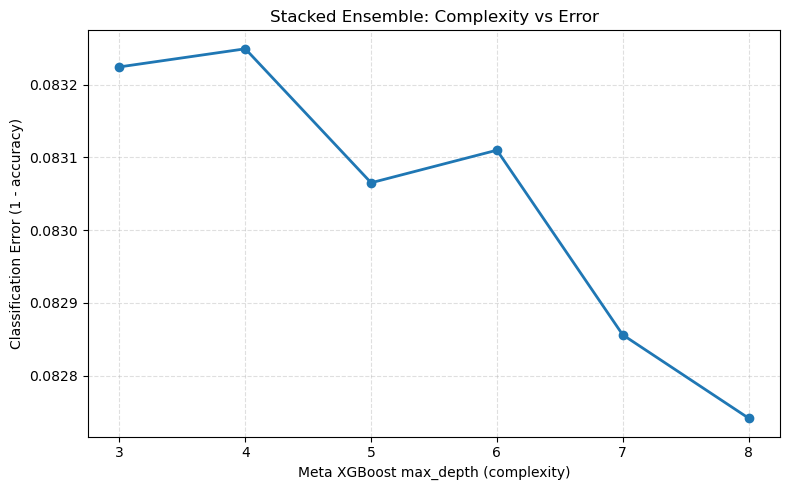

In [96]:
# ============================================================
# COMPLEXITY (MAX_DEPTH) VS ERROR FOR META XGBOOST
# ============================================================
import matplotlib.pyplot as plt

stack_depths = [3, 4, 5, 6, 7, 8]
stack_errors = []

print("=== Complexity vs Error (Stacked XGBoost) ===")
for depth in stack_depths:
    model_depth = XGBClassifier(
        objective="multi:softprob",
        num_class=num_classes,
        max_depth=depth,
        learning_rate=0.08,
        n_estimators=300,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="mlogloss",
        random_state=depth * 31,
        tree_method="hist",
        n_jobs=-1
    )

    model_depth.fit(stack_train, y_train_xgb_cnn)
    preds_depth = model_depth.predict(stack_test)
    error_depth = 1.0 - accuracy_score(y_test_xgb_cnn, preds_depth)
    stack_errors.append(error_depth)
    print(f"max_depth={depth:2d} -> error={error_depth:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(stack_depths, stack_errors, marker='o', linewidth=2, color='tab:blue')
plt.title("Stacked Ensemble: Complexity vs Error")
plt.xlabel("Meta XGBoost max_depth (complexity)")
plt.ylabel("Classification Error (1 - accuracy)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Ensemble : Naive Bayes + ANN 

In [98]:
# ============================================================
# DATA PREP FOR ANN + NAIVE BAYES ENSEMBLE (Guarded)
# ============================================================
# Creates the tensors this cell expects if they don't exist yet.
if "X_train_nb_ann_scaled" not in globals():
    # Select the most recent preprocessed dataframe
    if "df_new_2" in globals():
        df_model_nb_ann = df_new_2.copy()
    elif "df_new_1" in globals():
        df_model_nb_ann = df_new_1.copy()
    else:
        raise ValueError("df_new_2 or df_new_1 must exist before running this cell.")

    # Features and target
    X_nb_ann = df_model_nb_ann.drop(columns=["Crime_Class"])
    y_nb_ann, _ = pd.factorize(df_model_nb_ann["Crime_Class"])

    # Convert datetime → int64
    for col in X_nb_ann.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
        X_nb_ann[col] = X_nb_ann[col].view("int64")

    # Convert lists → strings; then factorize object columns
    for col in X_nb_ann.columns:
        if X_nb_ann[col].dtype == "object":
            X_nb_ann[col] = X_nb_ann[col].apply(lambda x: str(x) if isinstance(x, list) else x)
    X_nb_ann = X_nb_ann.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

    # Fill missing values
    X_nb_ann = X_nb_ann.fillna(X_nb_ann.median())

    # Split
    X_train_nb_ann, X_test_nb_ann, y_train_nb_ann, y_test_nb_ann = train_test_split(
        X_nb_ann, y_nb_ann, test_size=0.2, stratify=y_nb_ann, random_state=42
    )

    # Scale
    scaler_nb_ann = StandardScaler()
    X_train_nb_ann_scaled = scaler_nb_ann.fit_transform(X_train_nb_ann)
    X_test_nb_ann_scaled = scaler_nb_ann.transform(X_test_nb_ann)

    # One-hot targets
    num_classes_nb_ann = len(np.unique(y_nb_ann))
    y_train_nb_ann_cat = to_categorical(y_train_nb_ann, num_classes_nb_ann)
    y_test_nb_ann_cat = to_categorical(y_test_nb_ann, num_classes_nb_ann)

# ============================================================
# ANN BASE LEARNER
# ============================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

ann_nb_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_nb_ann_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(num_classes_nb_ann, activation="softmax")
])

ann_nb_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

es_ann = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history_ann_nb = ann_nb_model.fit(
    X_train_nb_ann_scaled,
    y_train_nb_ann_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[es_ann],
    verbose=1
)

ann_train_proba = ann_nb_model.predict(X_train_nb_ann_scaled, verbose=0)
ann_test_proba = ann_nb_model.predict(X_test_nb_ann_scaled, verbose=0)

ann_train_pred = ann_train_proba.argmax(axis=1)
ann_test_pred = ann_test_proba.argmax(axis=1)

print(f"ANN train accuracy : {accuracy_score(y_train_nb_ann, ann_train_pred):.4f}")
print(f"ANN test accuracy  : {accuracy_score(y_test_nb_ann, ann_test_pred):.4f}")

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.8885 - loss: 0.3601 - val_accuracy: 0.9074 - val_loss: 0.2793
Epoch 2/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9042 - loss: 0.2987 - val_accuracy: 0.9089 - val_loss: 0.2717
Epoch 3/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9061 - loss: 0.2892 - val_accuracy: 0.9111 - val_loss: 0.2658
Epoch 4/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9073 - loss: 0.2846 - val_accuracy: 0.9111 - val_loss: 0.2632
Epoch 5/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9079 - loss: 0.2815 - val_accuracy: 0.9121 - val_loss: 0.2610
Epoch 6/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.9081 - loss: 0.2794 - val_accuracy: 0.9113 - val_loss: 0.2620
Epoch 7/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9084 - loss: 0.2775 - val_accuracy: 0.9119 - val_loss: 0.2606
Epoch 8/10
5025/5025 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.9088 - loss: 0

In [100]:
# ============================================================
# MULTINOMIAL NAIVE BAYES WITH ALPHA TUNING
# ============================================================
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Map standardized features to non-negative range [0, 1] for MultinomialNB
minmax_nb = MinMaxScaler()
X_train_nb_ann_nonneg = minmax_nb.fit_transform(X_train_nb_ann_scaled)
X_test_nb_ann_nonneg = minmax_nb.transform(X_test_nb_ann_scaled)

# Define the alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Dictionary to store results
alpha_results = {}

# Iterate over each alpha value
for alpha_val in alphas:
    # 1. Initialize Multinomial Naive Bayes with the current alpha
    multinomial_nb = MultinomialNB(alpha=alpha_val)

    # 2. Fit the model (using your existing data variables)
    multinomial_nb.fit(X_train_nb_ann_nonneg, y_train_nb_ann)

    # 3. Predict
    nb_train_pred = multinomial_nb.predict(X_train_nb_ann_nonneg)
    nb_test_pred = multinomial_nb.predict(X_test_nb_ann_nonneg)

    # 4. Calculate accuracy
    train_accuracy = accuracy_score(y_train_nb_ann, nb_train_pred)
    test_accuracy = accuracy_score(y_test_nb_ann, nb_test_pred)

    # 5. Store results
    alpha_results[alpha_val] = {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "model": multinomial_nb  # Store the trained model if needed later
    }

    # 6. Print results for the current alpha
    print(f"--- Alpha = {alpha_val} ---")
    print(f"Multinomial Naive Bayes train accuracy : {train_accuracy:.4f}")
    print(f"Multinomial Naive Bayes test accuracy  : {test_accuracy:.4f}")

# Optional: Find the best alpha based on test accuracy
best_alpha = max(alpha_results, key=lambda k: alpha_results[k]['test_accuracy'])
print("\n" + "="*50)
print(f"🏆 Best Alpha (based on test accuracy): {best_alpha}")
print(f"   Test Accuracy: {alpha_results[best_alpha]['test_accuracy']:.4f}")
print("="*50)

# If you need the probability predictions for the best model:
best_model = alpha_results[best_alpha]['model']
nb_train_proba = best_model.predict_proba(X_train_nb_ann_nonneg)
nb_test_proba = best_model.predict_proba(X_test_nb_ann_nonneg)

--- Alpha = 0.01 ---
Multinomial Naive Bayes train accuracy : 0.8716
Multinomial Naive Bayes test accuracy  : 0.8717
--- Alpha = 0.1 ---
Multinomial Naive Bayes train accuracy : 0.8716
Multinomial Naive Bayes test accuracy  : 0.8717
--- Alpha = 1.0 ---
Multinomial Naive Bayes train accuracy : 0.8715
Multinomial Naive Bayes test accuracy  : 0.8717
--- Alpha = 10.0 ---
Multinomial Naive Bayes train accuracy : 0.8712
Multinomial Naive Bayes test accuracy  : 0.8715
--- Alpha = 100.0 ---
Multinomial Naive Bayes train accuracy : 0.8684
Multinomial Naive Bayes test accuracy  : 0.8686

🏆 Best Alpha (based on test accuracy): 1.0
   Test Accuracy: 0.8717


In [102]:
# ============================================================
# STACKED ENSEMBLE (ANN + NAIVE BAYES)
# ============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

stack_nb_ann_train = np.hstack([ann_train_proba, nb_train_proba])
stack_nb_ann_test = np.hstack([ann_test_proba, nb_test_proba])

meta_nb_ann = LogisticRegression(
    max_iter=2000,
    multi_class="multinomial",
    solver="lbfgs",
    n_jobs=-1
)

meta_nb_ann.fit(stack_nb_ann_train, y_train_nb_ann)

stack_nb_ann_pred = meta_nb_ann.predict(stack_nb_ann_test)
stack_nb_ann_proba = meta_nb_ann.predict_proba(stack_nb_ann_test)

ann_nb_blend = 0.5 * ann_test_proba + 0.5 * nb_test_proba
ann_nb_blend_pred = ann_nb_blend.argmax(axis=1)

print("=== Ensemble Evaluation (Naive Bayes + ANN) ===")
print(f"ANN only accuracy       : {accuracy_score(y_test_nb_ann, ann_test_pred):.4f}")
print(f"Naive Bayes only accuracy: {accuracy_score(y_test_nb_ann, nb_test_pred):.4f}")
print(f"Blend accuracy           : {accuracy_score(y_test_nb_ann, ann_nb_blend_pred):.4f}")
print(f"Stacked accuracy         : {accuracy_score(y_test_nb_ann, stack_nb_ann_pred):.4f}")

# Ensure label names are defined and aligned with factorization used for NB+ANN
if "nb_ann_labels" not in globals():
    if "df_model_nb_ann" in globals():
        nb_ann_labels = pd.factorize(df_model_nb_ann["Crime_Class"])[1]
    elif "df_new_2" in globals():
        nb_ann_labels = pd.factorize(df_new_2["Crime_Class"])[1]
    else:
        nb_ann_labels = pd.factorize(df_new_1["Crime_Class"])[1]

stack_nb_ann_report = classification_report(
    y_test_nb_ann,
    stack_nb_ann_pred,
    target_names=[str(lbl) for lbl in nb_ann_labels],
    output_dict=True
)

print("\nStacked Classification Report")
print(pd.DataFrame(stack_nb_ann_report).transpose())

=== Ensemble Evaluation (Naive Bayes + ANN) ===
ANN only accuracy       : 0.9127
Naive Bayes only accuracy: 0.8686
Blend accuracy           : 0.9018
Stacked accuracy         : 0.9128


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Stacked Classification Report
                                   precision    recall  f1-score  \
Property Crime                      0.958904  0.933208  0.945882   
Violent Crime                       0.938894  0.972932  0.955610   
Other Crime                         0.781836  0.648687  0.709065   
Vehicle Crime                       0.818826  0.954838  0.881617   
Weapons / Public Safety             0.784850  0.767885  0.776275   
Sex Crime                           0.792697  0.566976  0.661100   
Court / Restraining Order / Legal   0.933631  0.911116  0.922236   
Public Disturbance / Disorder       0.663160  0.709960  0.685763   
Fraud / Financial Crime             0.000000  0.000000  0.000000   
Child-Related Crime                 0.700272  0.461400  0.556277   
accuracy                            0.912811  0.912811  0.912811   
macro avg                           0.737307  0.692700  0.709382   
weighted avg                        0.912760  0.912811  0.911288   

                

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# ============================================================
# SHUFFLE-SPLIT CROSS-VALIDATION (ANN + NB STACK)
# ============================================================
from sklearn.model_selection import ShuffleSplit

stack_features_train = np.hstack([ann_train_proba, nb_train_proba])

ss_nb_ann = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
cv_scores_nb_ann = []

print("=== ShuffleSplit Validation (ANN + Naive Bayes stack) ===")
for fold, (train_idx, val_idx) in enumerate(ss_nb_ann.split(stack_features_train), start=1):
    X_tr, X_val = stack_features_train[train_idx], stack_features_train[val_idx]
    y_tr, y_val = y_train_nb_ann[train_idx], y_train_nb_ann[val_idx]

    meta_cv = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
        solver="lbfgs",
        n_jobs=-1,
        random_state=fold * 17
    )

    meta_cv.fit(X_tr, y_tr)
    fold_pred = meta_cv.predict(X_val)
    fold_acc = accuracy_score(y_val, fold_pred)
    cv_scores_nb_ann.append(fold_acc)
    print(f"Fold {fold}: accuracy = {fold_acc:.4f}")

cv_scores_nb_ann = np.array(cv_scores_nb_ann)
print("-------------------------------------------")
print(f"Mean accuracy : {cv_scores_nb_ann.mean():.4f}")
print(f"Std deviation : {cv_scores_nb_ann.std():.4f}")
print("-------------------------------------------")

=== ShuffleSplit Validation (ANN + Naive Bayes stack) ===
Fold 1: accuracy = 0.9144
Fold 2: accuracy = 0.9146
Fold 3: accuracy = 0.9130
Fold 4: accuracy = 0.9140
Fold 5: accuracy = 0.9135
-------------------------------------------
Mean accuracy : 0.9139
Std deviation : 0.0006
-------------------------------------------
